# **Load and Clean**

In [25]:
# Load All

import os
import glob
import pandas as pd

# Path to your data
path = 'GoogleReviews-20240420T223639Z-001/GoogleReviews' 
# Get all .csv files at your path
all_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize a list to store dataframes
dataframes = []

# Define a function to standardize column names and handle special cases
def standardize_columns(df, filename):
    # Rename columns to create a consistent schema
    column_renames = {
        'author_id': 'user_id',
        'author_title': 'author',
        'review_datetime_utc': 'timestamp',
    }
    df.rename(columns={old: new for old, new in column_renames.items() if old in df.columns}, inplace=True)

    # Check if 'rating' column exists; if it does, this is a special case file
    if 'rating' in df.columns and 'review_text' in df.columns:
        # Switch 'rating' and 'review_text'
        df['rating'], df['review_text'] = df['review_text'], df['rating']

    # Combine 'rating' and 'review_rating' into one column, preferring 'rating' if it exists
    if 'rating' in df.columns and 'review_rating' in df.columns:
        df['rating'] = df['rating'].fillna(df['review_rating'])
        df.drop(columns=['review_rating'], inplace=True, errors='ignore')
    elif 'review_rating' in df.columns:
        df.rename(columns={'review_rating': 'rating'}, inplace=True)
        
    # Add missing columns with NaNs
    desired_columns = ['user_id', 'author', 'timestamp', 'rating', 'review_text']
    for col in desired_columns:
        if col not in df.columns:
            df[col] = pd.NA

    # Add the filename as a new column
    df['file_name'] = filename.split('/')[-1]  # Get just the file name

    return df

# Process each file
for filename in all_files:
    df = pd.read_csv(filename)
    
    # Standardize column names and handle special cases
    df = standardize_columns(df, filename)
    
    # Append to the list of dataframes
    dataframes.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

In [26]:
combined_df.head()

timestamp           author                user_id  \
0  02/11/2024 15:59:38  Heidy Fernandez  103360372037270387417   
1  01/26/2024 22:16:50              R J  103202524746831207554   
2  12/30/2023 19:08:54  Eleni Belisonzi  106030427780813104531   
3  09/05/2023 14:40:24       Tom Donald  110477736284587831432   
4  08/18/2023 19:13:19        Evan Gray  117127716926195155753   

         review_text  rating  \
0                NaN       5   
1                NaN       5   
2  A neighbor jewel.       5   
3                NaN       5   
4                NaN       5   

                                           file_name  
0  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...  
1  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...  
2  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...  
3  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...  
4  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...

In [27]:
def extract_place_id(file_name):
    return file_name.split('\\')[-1][:27]

combined_df['place_id'] = combined_df['file_name'].apply(extract_place_id)

In [28]:
combined_df.head()

timestamp           author                user_id  \
0  02/11/2024 15:59:38  Heidy Fernandez  103360372037270387417   
1  01/26/2024 22:16:50              R J  103202524746831207554   
2  12/30/2023 19:08:54  Eleni Belisonzi  106030427780813104531   
3  09/05/2023 14:40:24       Tom Donald  110477736284587831432   
4  08/18/2023 19:13:19        Evan Gray  117127716926195155753   

         review_text  rating  \
0                NaN       5   
1                NaN       5   
2  A neighbor jewel.       5   
3                NaN       5   
4                NaN       5   

                                           file_name  \
0  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
1  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
2  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
3  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
4  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   

                      place_id  
0  ChIJ-5kFm5vIxokR8VHXewCN8eY  
1  ChIJ-5kFm5vIxokR8VHXewCN8eY  
2  ChIJ-5kFm5vIxokR8VHXewCN8eY  
3  ChIJ-5kFm5vIxokR8VHXewCN8eY  
4  ChIJ-5kFm5vIxokR8VHXewCN8eY

In [29]:
combined_df.to_csv('combined_reviews.csv', index=False)

In [30]:
ppr_df = pd.read_csv('PPR-parks-April17.csv')

In [31]:
ppr_df.head()

objectID   type                          ParkName  \
0     113.0  Point  John F Kennedy Plaza (LOVE Park)   
1     107.0  Point                Rittenhouse Square   
2     204.0  Point           Wissahickon Valley Park   
3     146.0  Point               East Fairmount Park   
4      23.0  Point    Franklin Delano Roosevelt Park   

                      GoogleID        Lat       Long  NumberRatings  inPhilly  \
0  ChIJkydYBi7GxokRB1nllBaz4zk  39.954132 -75.165640          14634         1   
1  ChIJIQGrHTrGxokRofc6nBBJrRU  39.949462 -75.171892           6465         1   
2  ChIJIcPcqf64xokRSPxypSWNWic  40.056211 -75.217331           6252         1   
3  ChIJ9yn9mbzHxokR1TbHNCkX9E4  39.984455 -75.197028           5222         1   
4  ChIJie9v2DbBxokRHylCIW7ceSA  39.902140 -75.183810           4338         1   

                                               Notes  Unnamed: 9  ...  \
0                                                NaN         NaN  ...   
1                                  no google ID here         NaN  ...   
2                                                NaN         NaN  ...   
3                                                NaN         NaN  ...   
4  should also consider\n\t\nChIJjQO6UDTFxokRKwip...         NaN  ...   

   Unnamed: 32  Unnamed: 33  Unnamed: 34  Unnamed: 35  Unnamed: 36  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 37  Unnamed: 38  Unnamed: 39  Unnamed: 40  Unnamed: 41  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 42 columns]

In [32]:
# Same Google ID as Pleasant Hill - no duplication

ppr_df = ppr_df[ppr_df['ParkName'] != 'Fish Hatchery at Pleasant Hill Park']

In [33]:
combined_df= combined_df.merge(ppr_df[['GoogleID', 'ParkName', 'Lat', 'Long']], 
                                left_on='place_id', 
                                right_on='GoogleID', 
                                how='left')

# Drop the now redundant 'GoogleID' column
combined_df.drop('GoogleID', axis=1, inplace=True)

combined_df.to_csv('combined_reviews_with_park_info.csv', index=False)

In [34]:
combined_df.head()

timestamp           author                user_id  \
0  02/11/2024 15:59:38  Heidy Fernandez  103360372037270387417   
1  01/26/2024 22:16:50              R J  103202524746831207554   
2  12/30/2023 19:08:54  Eleni Belisonzi  106030427780813104531   
3  09/05/2023 14:40:24       Tom Donald  110477736284587831432   
4  08/18/2023 19:13:19        Evan Gray  117127716926195155753   

         review_text  rating  \
0                NaN       5   
1                NaN       5   
2  A neighbor jewel.       5   
3                NaN       5   
4                NaN       5   

                                           file_name  \
0  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
1  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
2  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
3  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
4  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   

                      place_id       ParkName       Lat     Long  
0  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479  
1  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479  
2  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479  
3  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479  
4  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479

In [35]:
FDR = "Franklin Delano Roosevelt Park"

# Create a list of place_ids to update based on the second image
FDR_place_ids_to_update = [
    'ChIJjQO6UDTFxokRKwipjcz5Q5o',
    'ChIJB37Luk_FxokRSxEC_QgGmAU',
    'ChIJm1IODzjFxokREo4XLuKy_WQ',
    'ChIJa8NFISXFxokRyfcKW9fOUTU',
    'ChIJQ0ZFt63FxokRqkfAi0r4wPQ',
    'ChIJobR0mq63xokRiBpks2cGAo0',
    'ChIJZTP18zXFxokRZSENwg8ci8o']

for pid in FDR_place_ids_to_update:
    combined_df.loc[combined_df['place_id'] == pid, 'ParkName'] = FDR

In [36]:
len(combined_df[combined_df['ParkName'] == 'Franklin Delano Roosevelt Park'])

## orginal 4338, should worked

4362

In [37]:
Tacony = "Tacony Creek Park"

# Create a list of place_ids to update based on the second image
Tacony_place_ids_to_update = [
    'ChIJcf8po0u2xokRjKskdO6gjg4',
    'ChIJ26qgUku2xokRWu2KHZAoxso',
    'ChIJd_QXFbK3xokR6p-tgQG1jsA',
    'ChIJp-fcuq63xokReHv464Y-4jw',
    'ChIJpRYFA0u2xokRqCSGUUT3NTc',
    'ChIJobR0mq63xokRiBpks2cGAo0',
    'ChIJ_UE-k022xokRkn8Tn8lEZo0']

for pid in Tacony_place_ids_to_update:
    combined_df.loc[combined_df['place_id'] == pid, 'ParkName'] = Tacony

In [12]:
len(combined_df[combined_df['ParkName'] == 'Tacony Creek Park'])

## originally 1759

2260

In [38]:
len(combined_df)

82850

In [39]:
combined_df.head()

timestamp           author                user_id  \
0  02/11/2024 15:59:38  Heidy Fernandez  103360372037270387417   
1  01/26/2024 22:16:50              R J  103202524746831207554   
2  12/30/2023 19:08:54  Eleni Belisonzi  106030427780813104531   
3  09/05/2023 14:40:24       Tom Donald  110477736284587831432   
4  08/18/2023 19:13:19        Evan Gray  117127716926195155753   

         review_text  rating  \
0                NaN       5   
1                NaN       5   
2  A neighbor jewel.       5   
3                NaN       5   
4                NaN       5   

                                           file_name  \
0  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
1  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
2  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
3  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   
4  GoogleReviews\ChIJ-5kFm5vIxokR8VHXewCN8eY_Dela...   

                      place_id       ParkName       Lat     Long  
0  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479  
1  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479  
2  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479  
3  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479  
4  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479

In [40]:
len(combined_df['ParkName'].unique())

## Merged some park names to the larger parks but lat and long and place-id was original

163

In [41]:
combined_df.to_csv('combined_reviews_with_park_info.csv', index=False)

## **Filter: parks with over 25 comments**

In [42]:
combined_df = combined_df.drop('file_name', axis=1)

combined_df = combined_df.groupby('ParkName').filter(lambda x: x['review_text'].count() >= 25)


combined_df.head()

timestamp           author                user_id  \
0  02/11/2024 15:59:38  Heidy Fernandez  103360372037270387417   
1  01/26/2024 22:16:50              R J  103202524746831207554   
2  12/30/2023 19:08:54  Eleni Belisonzi  106030427780813104531   
3  09/05/2023 14:40:24       Tom Donald  110477736284587831432   
4  08/18/2023 19:13:19        Evan Gray  117127716926195155753   

         review_text  rating                     place_id       ParkName  \
0                NaN       5  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park   
1                NaN       5  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park   
2  A neighbor jewel.       5  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park   
3                NaN       5  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park   
4                NaN       5  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park   

        Lat     Long  
0  39.94408 -75.1479  
1  39.94408 -75.1479  
2  39.94408 -75.1479  
3  39.94408 -75.1479  
4  39.94408 -75.1479

In [43]:
len(combined_df['ParkName'].unique())

92

## **Spatial Join and get Geometry**

In [19]:
import geopandas as gpd


# PPR data
park_df = gpd.read_file('PPR_Properties.geojson')
park_df = park_df.to_crs("EPSG:4326")

In [20]:
park_df.head()

OBJECTID                                     PUBLIC_NAME  \
0         1  William H (Billy) Markward Memorial Playground   
1         2                                Schuylkill Banks   
2         3                           Schuylkill River Park   
3         4                           Frankford Boat Launch   
4         5                            Robert A Borski Park   

             PARENT_NAME NESTED  \
0  Schuylkill River Park      Y   
1       Schuylkill Banks      N   
2  Schuylkill River Park      N   
3  Frankford Boat Launch      N   
4   Robert A Borski Park      N   

                                     OFFICIAL_NAME                  LABEL  \
0  William H. (Billy) Markward Memorial Playground               Markward   
1                                              NaN       Schuylkill Banks   
2                                              NaN  Schuylkill River Park   
3                            Frankford Boat Launch       Frankford Launch   
4                            Robert A. Borski Park                 Borski   

                                               ALIAS  DPP_ASSET_ID  \
0                      Joseph O'Connor Memorial Pool          1903   
1                                                NaN          2794   
2                                                NaN          2992   
3       PA Fish & Boat;Frankford Arsenal Boat Launch          3090   
4  Orthodox Street Parcel; Bridesburg Riverfront ...          3091   

        ADDRESS_911 ZIP_CODE  ... PPR_OPS_DISTRICT COUNCIL_DISTRICT  \
0    400 S TANEY ST    19146  ...              5;7                2   
1  2425 CHESTNUT ST    19103  ...              5;7              2;5   
2    400 S TANEY ST    19146  ...             5, 7                2   
3    5625 TACONY ST    19137  ...                2                6   
4  3101 ORTHODOX ST    19137  ...                2                6   

   POLICE_DISTRICT CITY_SCALE_MAPS LOCAL_SCALE_MAPS PROGRAM_SITES  \
0             9;17               Y                Y             Y   
1             9;17               Y                Y             N   
2                9               Y                Y             N   
3               15               Y                Y             N   
4               15               Y                Y             N   

                                            COMMENTS    Shape__Area  \
0           Markward site includes the O'Connor Pool   25871.441406   
1    Bill 160113 (4/14/16) -South of South St Bridge  101477.171875   
2                                                NaN   27216.929688   
3                                                NaN   78515.335938   
4  Officially acquired from PAID in 10/2019. Doc ...   72926.187500   

  Shape__Length                                           geometry  
0   1094.402639  MULTIPOLYGON (((-75.18307 39.94826, -75.18314 ...  
1   9300.670275  POLYGON ((-75.18103 39.96361, -75.18075 39.963...  
2    799.048584  POLYGON ((-75.18314 39.94821, -75.18307 39.948...  
3   1585.376114  POLYGON ((-75.05596 40.00750, -75.05601 40.007...  
4   1304.901416  POLYGON ((-75.06707 39.99007, -75.06713 39.990...  

[5 rows x 26 columns]

In [21]:
combined_df = gpd.GeoDataFrame(
    combined_df, 
    geometry=gpd.points_from_xy(combined_df['Long'], combined_df['Lat']),
    crs="EPSG:4326"  # WGS 84
)

In [22]:
from geopandas.tools import sjoin

projected_crs = 'EPSG:3857'  # Replace with the appropriate UTM CRS for your area
park_df = park_df.to_crs(projected_crs)
combined_df = combined_df.to_crs(projected_crs)
feet_to_meters = 100 / 3.281  # Convert 100 feet to meters
combined_df['buffered_geometry'] = combined_df.geometry.buffer(feet_to_meters)

# Make sure there are no columns named 'index_left' or 'index_right'
if 'index_left' in combined_df.columns:
    combined_df.drop(columns='index_left', inplace=True)
if 'index_right' in combined_df.columns:
    combined_df.drop(columns='index_right', inplace=True)
if 'index_left' in park_df.columns:
    park_df.drop(columns='index_left', inplace=True)
if 'index_right' in park_df.columns:
    park_df.drop(columns='index_right', inplace=True)

# Perform the spatial join using the buffered points for intersection
joined_df = sjoin(combined_df.set_geometry('buffered_geometry'), park_df, how='left', predicate='intersects')

# The joined GeoDataFrame will have an 'index_right' column referring to the index of park_df
# Now, let's drop the buffered_geometry and reset to original point geometry
joined_df.drop(columns='buffered_geometry', inplace=True)
joined_df.set_geometry('geometry', inplace=True)

# Retain only the desired columns, which should not include 'index_left' or 'index_right'
desired_columns = ['ParkName', 'timestamp', 'author', 'user_id', 'review_text', 'rating', 'place_id', 'Long', 'Lat', 'geometry']
final_df = joined_df[desired_columns]

# Reproject to WGS 84 if needed and convert to DataFrame for CSV export
final_df = final_df.to_crs(epsg=4326)
final_df['geometry'] = final_df['geometry'].astype(str)  # Convert geometry to WKT for CSV compatibility


D:\Anaconda\Install\envs\musa-550-fall-2023\lib\site-packages\geopandas\geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [23]:
combined_df = final_df
combined_df.head()
combined_df.to_csv('with_geometry.csv', index=False)

In [24]:
combined_df.head()

ParkName            timestamp           author                user_id  \
0  Delancey Park  02/11/2024 15:59:38  Heidy Fernandez  103360372037270387417   
1  Delancey Park  01/26/2024 22:16:50              R J  103202524746831207554   
2  Delancey Park  12/30/2023 19:08:54  Eleni Belisonzi  106030427780813104531   
3  Delancey Park  09/05/2023 14:40:24       Tom Donald  110477736284587831432   
4  Delancey Park  08/18/2023 19:13:19        Evan Gray  117127716926195155753   

         review_text  rating                     place_id     Long       Lat  \
0                NaN       5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
1                NaN       5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
2  A neighbor jewel.       5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
3                NaN       5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
4                NaN       5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   

                    geometry  
0  POINT (-75.1479 39.94408)  
1  POINT (-75.1479 39.94408)  
2  POINT (-75.1479 39.94408)  
3  POINT (-75.1479 39.94408)  
4  POINT (-75.1479 39.94408)

# **Basic Exploration**

### *Changes of Review Amouth over Month*

In [13]:
import pandas as pd
import geopandas as gpd

combined_df = pd.read_csv('with_geometry.csv')

In [2]:
# Filter out rows with NaN 'review_text'
reviews_df = combined_df[combined_df['review_text'].notna()]

reviews_df.head()


ParkName            timestamp              author  \
2   Delancey Park  12/30/2023 19:08:54     Eleni Belisonzi   
5   Delancey Park  08/14/2023 17:51:59      Marta Harrison   
11  Delancey Park  06/06/2023 11:43:07  Akshita Srivastava   
13  Delancey Park  04/20/2023 20:58:42        Andy Reinoso   
17  Delancey Park  03/20/2023 22:03:31       Moaaz Marzouk   

                  user_id                                        review_text  \
2   106030427780813104531                                  A neighbor jewel.   
5   116743363301808220011  visited in a nostalgia trip, as I took my todd...   
11  111921958911249462562       Hung out in peace, great for solitude lovers   
13  116446471570828426598  Nice little park in the middle of old historic...   
17  110355050307790944461                          Nice small place for kids   

    rating                     place_id     Long       Lat  \
2        5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
5        4  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
11       5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
13       4  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
17       4  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   

                     geometry  
2   POINT (-75.1479 39.94408)  
5   POINT (-75.1479 39.94408)  
11  POINT (-75.1479 39.94408)  
13  POINT (-75.1479 39.94408)  
17  POINT (-75.1479 39.94408)

In [4]:
# Convert the 'timestamp' column to datetime
reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'], errors='coerce')
# Filter out data before 2016
reviews_df = reviews_df[reviews_df['timestamp'].dt.year >= 2016]

C:\Users\gaoxi\AppData\Local\Temp\ipykernel_46680\644511960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'], errors='coerce')


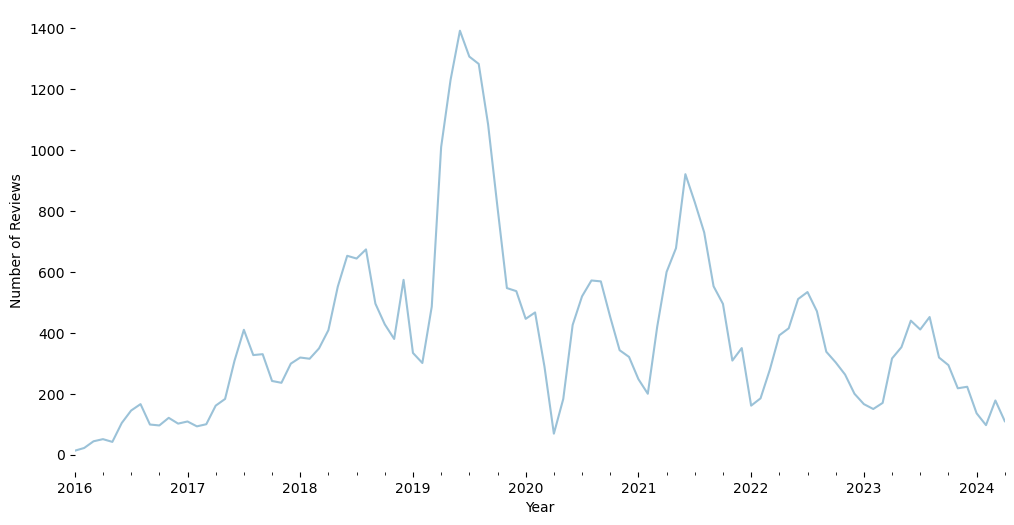

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and year
monthly_reviews = reviews_df.groupby(reviews_df['timestamp'].dt.to_period("M")).size()

fig, ax = plt.subplots(figsize=(12, 6))
monthly_reviews.plot(kind='line', ax=ax, color='#9BC2D8')  


plt.xticks(rotation=0) 

#plt.title('Total Number of Park Reviews per Month (From 2016 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
ax.grid(False)
#sns.despine(left=False, bottom=False, right=True, top=True)

sns.despine(left=True, bottom=True, right=True, top=True)
plt.show()
#fig.savefig("D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/review_amounts_over_yearnmonths.png", dpi=300, bbox_inches="tight", transparent=False)

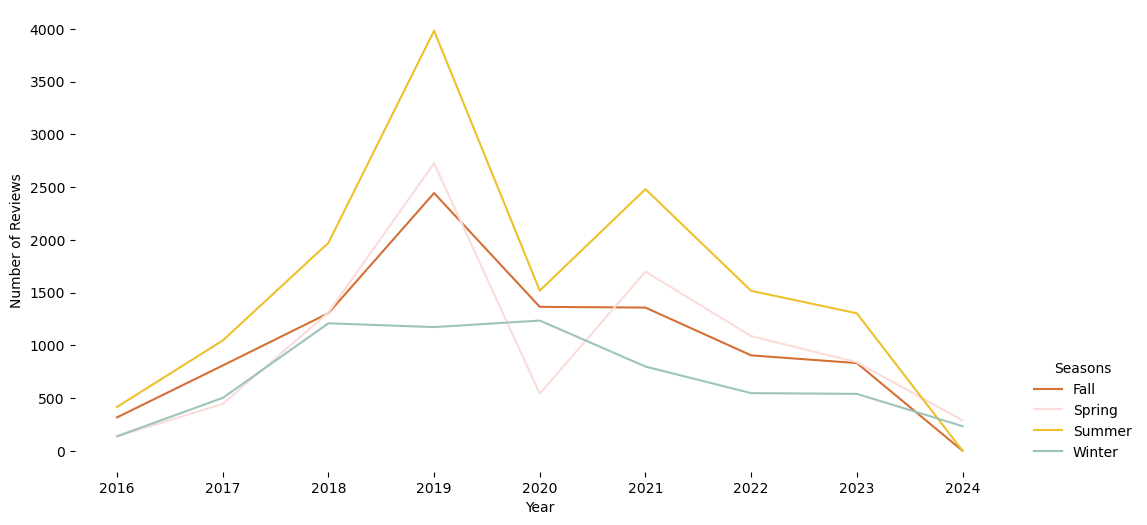

In [7]:
# Map months to seasons
month_to_season = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                   6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 
                   11: 'Fall', 12: 'Winter'}

reviews_df['season'] = reviews_df['timestamp'].dt.month.map(month_to_season)

# Group by year and season
seasonal_reviews = reviews_df.groupby([reviews_df['timestamp'].dt.year, 'season']).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
colors = {'Spring': '#FADCD8', 'Summer': '#EDC02C', 'Fall': '#D47035', 'Winter': '#9CC4BC'}
seasonal_reviews.plot(kind='line', ax=ax, color=[colors[season] for season in seasonal_reviews.columns])


#plt.title('Total Number of Reviews per Trimester Since 2016')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(False)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.legend( title="Seasons", loc='lower right', bbox_to_anchor=(1.15, 0), frameon=False)
plt.show()
fig.savefig("D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/review_amounts_over_yearbyseason.png", dpi=300, bbox_inches="tight", transparent=False)

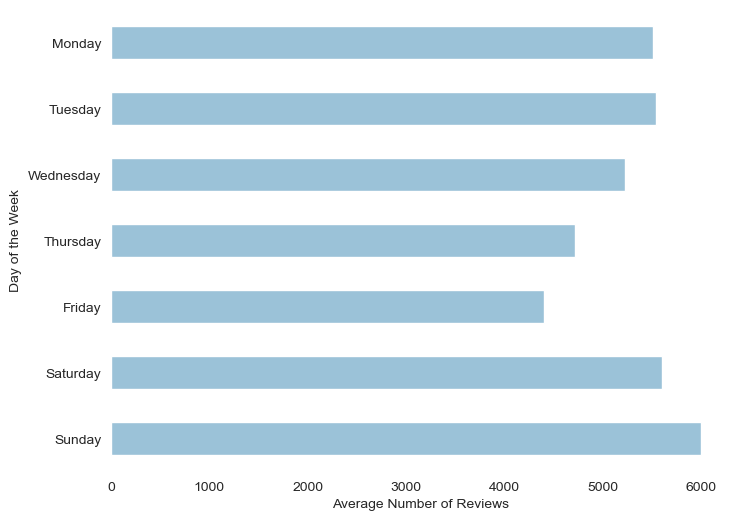

In [146]:
# Mapping day of the week
reviews_df['day_of_week'] = reviews_df['timestamp'].dt.day_name()

# Group by day of the week and calculate the mean
weekday_reviews = reviews_df.groupby('day_of_week').size().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekday_reviews = weekday_reviews.iloc[::-1]
fig, ax = plt.subplots(figsize=(8, 6))
weekday_reviews.plot(kind='barh', ax=ax, color='#9BC2D8')  # Change the color code here

#plt.title('Average Number of Reviews by Day of the Week')
plt.ylabel('Day of the Week')
plt.xlabel('Average Number of Reviews')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)
plt.show()
fig.savefig("D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/review_amounts_by_weekday.png", dpi=300, bbox_inches="tight", transparent=False)

In [25]:
# Transform Date 

reviews_df.loc[:, 'time'] = pd.to_datetime(reviews_df['timestamp'])

# Create a dictionary to map month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_review_count = reviews_df.groupby(reviews_df['time'].dt.strftime('%b'))['review_text'].count()

# Ensure the monthly data is in the right order
monthly_review_count = monthly_review_count.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])



C:\Users\gaoxi\AppData\Local\Temp\ipykernel_18880\3703798885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.loc[:, 'time'] = pd.to_datetime(reviews_df['timestamp'])


In [39]:
reviews_df.head()

ParkName           timestamp              author  \
2   Delancey Park 2023-12-30 19:08:54     Eleni Belisonzi   
5   Delancey Park 2023-08-14 17:51:59      Marta Harrison   
11  Delancey Park 2023-06-06 11:43:07  Akshita Srivastava   
13  Delancey Park 2023-04-20 20:58:42        Andy Reinoso   
17  Delancey Park 2023-03-20 22:03:31       Moaaz Marzouk   

                  user_id                                        review_text  \
2   106030427780813104531                                  A neighbor jewel.   
5   116743363301808220011  visited in a nostalgia trip, as I took my todd...   
11  111921958911249462562       Hung out in peace, great for solitude lovers   
13  116446471570828426598  Nice little park in the middle of old historic...   
17  110355050307790944461                          Nice small place for kids   

    rating                     place_id     Long       Lat  \
2        5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
5        4  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
11       5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
13       4  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
17       4  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   

                     geometry                time  
2   POINT (-75.1479 39.94408) 2023-12-30 19:08:54  
5   POINT (-75.1479 39.94408) 2023-08-14 17:51:59  
11  POINT (-75.1479 39.94408) 2023-06-06 11:43:07  
13  POINT (-75.1479 39.94408) 2023-04-20 20:58:42  
17  POINT (-75.1479 39.94408) 2023-03-20 22:03:31

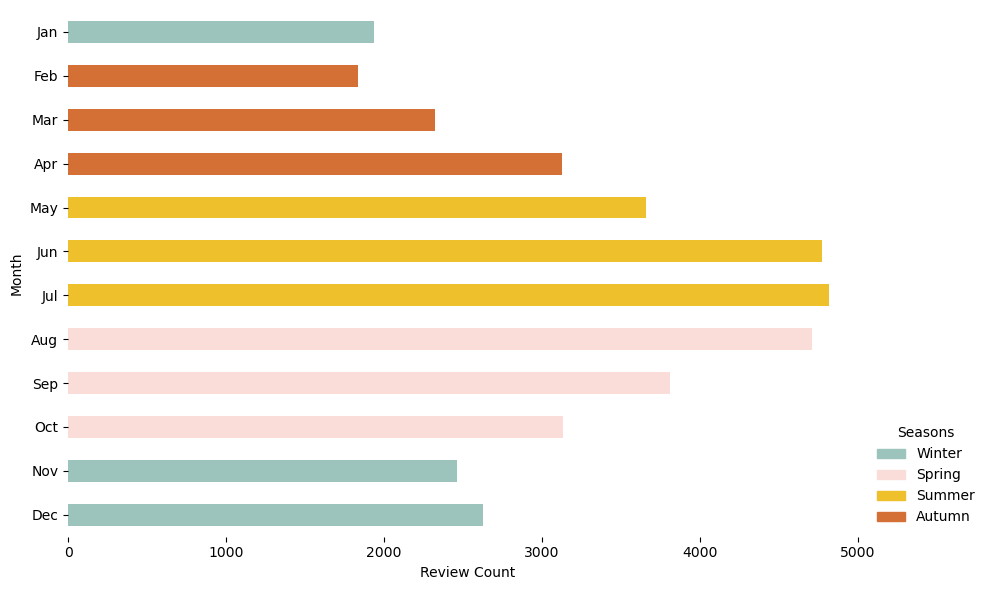

In [31]:
import matplotlib.patches as mpatches

# Ensure the monthly data is in the right order
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_review_count = monthly_review_count.reindex(ordered_months).iloc[::-1]

# Define colors for the four seasons: Winter, Spring, Summer, Autumn
season_colors = {
    'Jan': '#9CC4BC', 'Feb': '#9CC4BC', 'Mar': '#FADCD8',
    'Apr': '#FADCD8', 'May': '#FADCD8', 'Jun': '#EDC02C',
    'Jul': '#EDC02C', 'Aug': '#EDC02C', 'Sep': '#D47035',
    'Oct': '#D47035', 'Nov': '#D47035', 'Dec': '#9CC4BC'
}

# Colors list corresponding to each month
colors = [season_colors[month] for month in ordered_months]


# Plot the data
fig = plt.figure(figsize=(12, 6))
monthly_review_count.plot(kind='barh', color=colors)
#plt.title('Changes of Review Amount over Month')
plt.xlabel('Review Count')
plt.ylabel('Month')
plt.xticks(rotation=0)
plt.box(on=None)

# Create a legend for the seasons
season_legend = {
    'Winter': '#9CC4BC',
    'Spring': '#FADCD8',
    'Summer': '#EDC02C',
    'Autumn': '#D47035'
}

# Create patch list for legend handles
patches = [mpatches.Patch(color=color, label=season) for season, color in season_legend.items()]

plt.legend(handles=patches, title="Seasons", loc='lower right', bbox_to_anchor=(1.15, 0), frameon=False)
plt.grid(False)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()

fig.savefig("D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/review_amounts_over_months.png", dpi=300, bbox_inches="tight", transparent=False)

### *Review-Comment Ratio*

In [29]:
combined_df.loc[:, 'time'] = pd.to_datetime(combined_df['timestamp'])

# Create a dictionary to map month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_rating_count = combined_df.groupby(combined_df['time'].dt.strftime('%b'))['rating'].count()

monthly_ratio = monthly_review_count/monthly_rating_count


ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_ratio = monthly_ratio.reindex(ordered_months)


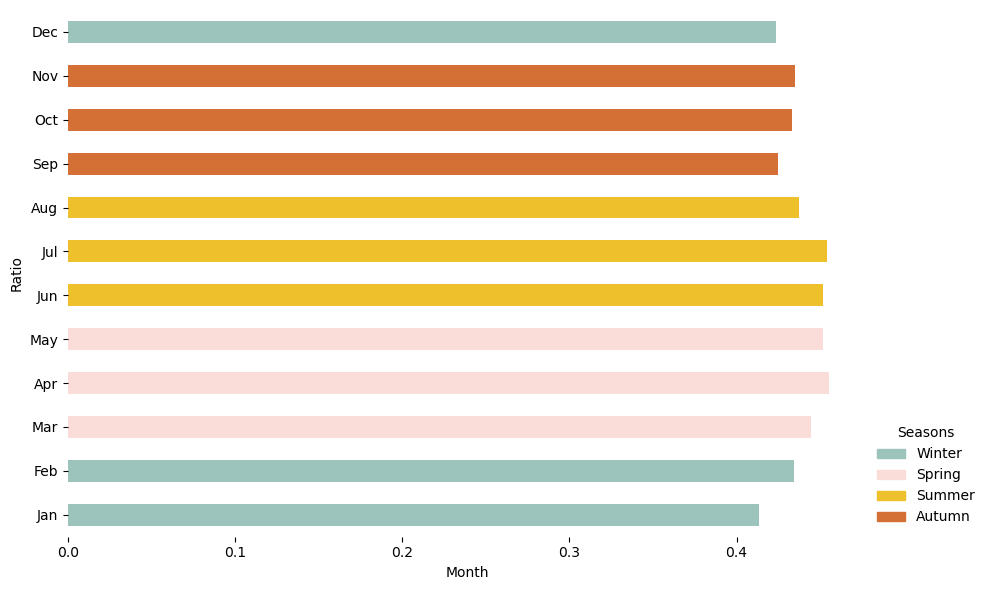

In [30]:
# Define colors for the four seasons: Winter, Spring, Summer, Autumn
season_colors = {
    'Jan': '#9CC4BC', 'Feb': '#9CC4BC', 'Mar': '#FADCD8',
    'Apr': '#FADCD8', 'May': '#FADCD8', 'Jun': '#EDC02C',
    'Jul': '#EDC02C', 'Aug': '#EDC02C', 'Sep': '#D47035',
    'Oct': '#D47035', 'Nov': '#D47035', 'Dec': '#9CC4BC'
}

# Colors list corresponding to each month
colors = [season_colors[month] for month in ordered_months]


# Plot the data
fig=plt.figure(figsize=(12, 6))
monthly_ratio.plot(kind='barh', color=colors)
#plt.title('Changes of Review-Rating Ratio over Month')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.box(on=None)

# Create a legend for the seasons
season_legend = {
    'Winter': '#9CC4BC',
    'Spring': '#FADCD8',
    'Summer': '#EDC02C',
    'Autumn': '#D47035'
}

# Create patch list for legend handles
patches = [mpatches.Patch(color=color, label=season) for season, color in season_legend.items()]

plt.legend(handles=patches, title="Seasons", loc='lower right', bbox_to_anchor=(1.15, 0), frameon=False)
plt.grid(False)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()
fig.savefig("D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/review_rating_ratio_over_months.png", dpi=300, bbox_inches="tight", transparent=False)

In [28]:
reviews_df.to_csv('review_with_geometry.csv', index=False)

In [ ]:
def define_function(park_name):
    if isinstance(park_name, str):
        lower_park_name = park_name.lower()
        if 'playground' in lower_park_name:
            return 'Playground'
        elif 'court' in lower_park_name or 'tennis' in lower_park_name:
            return 'Sport Court'
        elif 'banks' in lower_park_name or 'river' in lower_park_name or 'creek' in lower_park_name:
            return 'Watershed Park'
        elif 'memorial' in lower_park_name:
            return 'Memorial Park'
        elif 'square' in lower_park_name:
            return 'Sqaure'
        elif 'valley' in lower_park_name:
            return 'Natural Reservation'
        else:
            return 'Regular'

# Assuming 'reviews_df' is your dataframe and 'ParkName' is the column with park names
reviews_df['Function'] = reviews_df['ParkName'].apply(define_function)

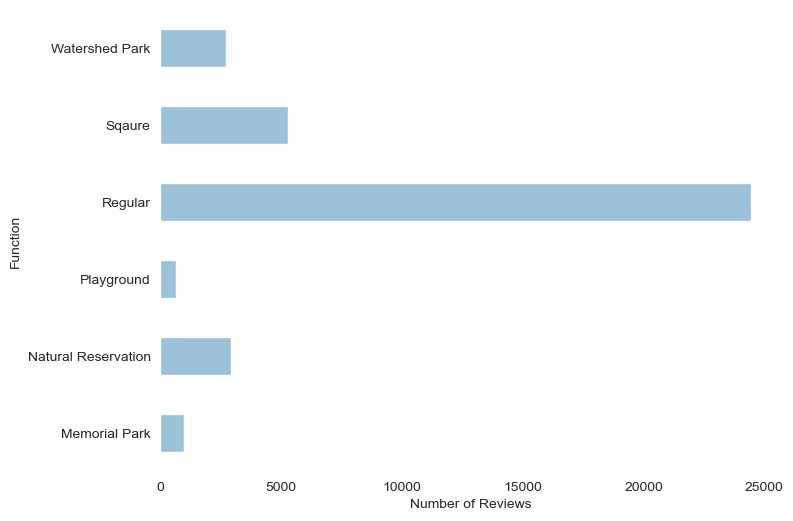

In [148]:
function_reviews = reviews_df.groupby('Function').size()

fig, ax = plt.subplots(figsize=(8, 6))
function_reviews.plot(kind='barh', ax=ax, color='#9BC2D8') 

#plt.title('Number of Reviews by Park Function')
plt.ylabel('Function')
plt.xlabel('Number of Reviews')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)  
plt.show()

fig.savefig("D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/review_amounts_by_function.png", dpi=300, bbox_inches="tight", transparent=False)

## *Mapping*

In [8]:
reviews_df.head()

ParkName           timestamp              author  \
2   Delancey Park 2023-12-30 19:08:54     Eleni Belisonzi   
5   Delancey Park 2023-08-14 17:51:59      Marta Harrison   
11  Delancey Park 2023-06-06 11:43:07  Akshita Srivastava   
13  Delancey Park 2023-04-20 20:58:42        Andy Reinoso   
17  Delancey Park 2023-03-20 22:03:31       Moaaz Marzouk   

                  user_id                                        review_text  \
2   106030427780813104531                                  A neighbor jewel.   
5   116743363301808220011  visited in a nostalgia trip, as I took my todd...   
11  111921958911249462562       Hung out in peace, great for solitude lovers   
13  116446471570828426598  Nice little park in the middle of old historic...   
17  110355050307790944461                          Nice small place for kids   

    rating                     place_id     Long       Lat  \
2        5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
5        4  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
11       5  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
13       4  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   
17       4  ChIJ-5kFm5vIxokR8VHXewCN8eY -75.1479  39.94408   

                     geometry  season  
2   POINT (-75.1479 39.94408)  Winter  
5   POINT (-75.1479 39.94408)  Summer  
11  POINT (-75.1479 39.94408)  Summer  
13  POINT (-75.1479 39.94408)  Spring  
17  POINT (-75.1479 39.94408)  Spring

In [9]:
review_count_by_park = reviews_df.groupby('ParkName')['review_text'].count().reset_index(name='review_count_by_park')

In [10]:
park_plot = reviews_df.drop_duplicates(subset='ParkName')[['ParkName', 'Long', 'Lat']]
park_plot = park_plot.merge(review_count_by_park, on='ParkName', how='left')

park_plot.head()

ParkName       Long        Lat  \
0                             Delancey Park -75.147900  39.944080   
1                            Mifflin Square -75.156519  39.919477   
2                       William Lanier Park -75.193880  39.933620   
3  Marian Winfield Hissey Recreation Center -75.123340  39.994330   
4                               Palmer Park -75.132540  39.974890   

   review_count_by_park  
0                   102  
1                   165  
2                    80  
3                    50  
4                    86

In [11]:
park_plot.sort_values(by='review_count_by_park', ascending=False).head(10)

ParkName       Long        Lat  \
60     John F Kennedy Plaza (LOVE Park) -75.165640  39.954132   
50              Wissahickon Valley Park -75.217331  40.056211   
52                   Rittenhouse Square -75.171892  39.949462   
21                  East Fairmount Park -75.197028  39.984455   
51       Franklin Delano Roosevelt Park -75.183810  39.902140   
19                      Belmont Plateau -75.212664  39.990324   
8   Fish Hatchery at Pleasant Hill Park -74.992837  40.042569   
9                    Pleasant Hill Park -74.992840  40.042570   
75                     Penn Treaty Park -75.128479  39.966274   
31                Clarence H Clark Park -75.210414  39.948897   

    review_count_by_park  
60                  6219  
50                  2920  
52                  2794  
21                  2028  
51                  2009  
19                  1726  
8                   1479  
9                   1479  
75                  1318  
31                  1216

In [14]:
park_plot = gpd.GeoDataFrame(
    park_plot, 
    geometry=gpd.points_from_xy(park_plot['Long'], park_plot['Lat'])
)

# Set the original CRS for the GeoDataFrame
park_plot.set_crs('EPSG:4326', inplace=True)

# Convert to the CRS for basemapping, which typically uses 'EPSG:3857'
#park_plot.to_crs('EPSG:3857', inplace=True)

ParkName       Long        Lat  \
0                              Delancey Park -75.147900  39.944080   
1                             Mifflin Square -75.156519  39.919477   
2                        William Lanier Park -75.193880  39.933620   
3   Marian Winfield Hissey Recreation Center -75.123340  39.994330   
4                                Palmer Park -75.132540  39.974890   
..                                       ...        ...        ...   
88              Frankford and Pennypack Park -75.035803  40.049551   
89                            Pennypack Park -75.035803  40.049551   
90                            Gold Star Park -75.155180  39.932940   
91                     Frank Palumbo Sr Park -75.155587  39.939260   
92                  Giuseppe Bardascino Park -75.159919  39.937796   

    review_count_by_park                    geometry  
0                    102  POINT (-75.14790 39.94408)  
1                    165  POINT (-75.15652 39.91948)  
2                     80  POINT (-75.19388 39.93362)  
3                     50  POINT (-75.12334 39.99433)  
4                     86  POINT (-75.13254 39.97489)  
..                   ...                         ...  
88                    72  POINT (-75.03580 40.04955)  
89                    72  POINT (-75.03580 40.04955)  
90                    74  POINT (-75.15518 39.93294)  
91                    27  POINT (-75.15559 39.93926)  
92                    42  POINT (-75.15992 39.93780)  

[93 rows x 5 columns]

In [38]:
print(park_plot.crs)

EPSG:4326


In [15]:
planning_districts = gpd.read_file("Planning_Districts.geojson")
city_limits = gpd.read_file("City_Limits.geojson")
hydrographic_line = gpd.read_file("Hydrographic_Features_Arc.geojson")

D:\Anaconda\Install\envs\musa-550-fall-2023\lib\site-packages\geopandas\io\file.py:383: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


In [16]:
ppr = gpd.read_file("ppr_properties.geojson")

In [17]:
url = "https://services.arcgis.com/fLeGjb7u4uXqeF9q/arcgis/rest/services/Hydrographic_Features_Poly/FeatureServer/1/query?outFields=*&where=1%3D1&f=geojson"
hydrographic_poly = gpd.read_file(url)

In [18]:
planning_districts.set_crs('EPSG:4326', inplace=True)
city_limits.set_crs('EPSG:4326', inplace=True)
hydrographic_poly.set_crs('EPSG:4326', inplace=True)
ppr.set_crs('EPSG:4326', inplace=True)


OBJECTID                                     PUBLIC_NAME  \
0           1  William H (Billy) Markward Memorial Playground   
1           2                                Schuylkill Banks   
2           3                           Schuylkill River Park   
3           4                           Frankford Boat Launch   
4           5                            Robert A Borski Park   
..        ...                                             ...   
503       504                       Lawrence Court Breezeways   
504       505                                   Fernhill Park   
505       506                   School District Area (Gorgas)   
506       507                               Susan Gorgas Park   
507       508             Mann Center for the Performing Arts   

                   PARENT_NAME NESTED  \
0        Schuylkill River Park      Y   
1             Schuylkill Banks      N   
2        Schuylkill River Park      N   
3        Frankford Boat Launch      N   
4         Robert A Borski Park      N   
..                         ...    ...   
503  Lawrence Court Breezeways      N   
504              Fernhill Park      N   
505          Susan Gorgas Park      Y   
506          Susan Gorgas Park      Y   
507        West Fairmount Park      Y   

                                       OFFICIAL_NAME  \
0    William H. (Billy) Markward Memorial Playground   
1                                                NaN   
2                                                NaN   
3                              Frankford Boat Launch   
4                              Robert A. Borski Park   
..                                               ...   
503                                              NaN   
504                                              NaN   
505                                              NaN   
506                                Susan Gorgas Park   
507          The Mann Center for the Performing Arts   

                        LABEL  \
0                    Markward   
1            Schuylkill Banks   
2       Schuylkill River Park   
3            Frankford Launch   
4                      Borski   
..                        ...   
503        Lawrence Breezeway   
504                  Fernhill   
505  Gorgas (School District)   
506                    Gorgas   
507               Mann Center   

                                                 ALIAS  DPP_ASSET_ID  \
0                        Joseph O'Connor Memorial Pool          1903   
1                                                  NaN          2794   
2                                                  NaN          2992   
3         PA Fish & Boat;Frankford Arsenal Boat Launch          3090   
4    Orthodox Street Parcel; Bridesburg Riverfront ...          3091   
..                                                 ...           ...   
503                            Lawrence Court Walkways          3867   
504                                                              833   
505                                                NaN             0   
506                                                NaN           803   
507               The Mann Center;Robin Hood Dell West          3634   

                     ADDRESS_911 ZIP_CODE  ... PPR_OPS_DISTRICT  \
0                 400 S TANEY ST    19146  ...              5;7   
1               2425 CHESTNUT ST    19103  ...              5;7   
2                 400 S TANEY ST    19146  ...             5, 7   
3                 5625 TACONY ST    19137  ...                2   
4               3101 ORTHODOX ST    19137  ...                2   
..                           ...      ...  ...              ...   
503              335 LAWRENCE CT    19106  ...                5   
504               4600 MORRIS ST    19144  ...                4   
505                          NaN    19128  ...                4   
506               6424 RIDGE AVE    19128  ...                4   
507  5038 AVENUE OF THE REPUBLIC    19131  ...             

In [19]:
import requests
import numpy as np

In [20]:
hydro = gpd.read_file("hydro.geojson")

In [21]:
hydro.set_crs('EPSG:4326', inplace=True)

FID  OBJECTID                         CREEK_NAME  \
0        1         1            Haines-Dittingers Creek   
1        2         2            Haines-Dittingers Creek   
2        3         3                    Trewellyn Creek   
3        4         4  Trewellyn Creek, unnamed trib (A)   
4        5         5                    Trewellyn Creek   
...    ...       ...                                ...   
7933  7934      7934  Delaware River, unnamed tributary   
7934  7935      7935  Delaware River, unnamed tributary   
7935  7936      7936  Delaware River, unnamed tributary   
7936  7937      7937  Delaware River, unnamed tributary   
7937  7938      7938  Delaware River, unnamed tributary   

                        MUNI               COUNTY                  WATERSHED  \
0     Upper Gwynedd Township           Montgomery          Wissahickon Creek   
1     Upper Gwynedd Township           Montgomery          Wissahickon Creek   
2             Montgomery TWP           Montgomery          Wissahickon Creek   
3              Lower Gwynedd           Montgomery          Wissahickon Creek   
4              Lower Gwynedd           Montgomery          Wissahickon Creek   
...                      ...                  ...                        ...   
7933       Philadelphia city  Philadelphia County  Delaware Direct Watershed   
7934       Philadelphia city  Philadelphia County  Delaware Direct Watershed   
7935       Philadelphia city  Philadelphia County  Delaware Direct Watershed   
7936       Philadelphia city  Philadelphia County  Delaware Direct Watershed   
7937       Philadelphia city  Philadelphia County  Delaware Direct Watershed   

                      SUBSHED LABEL SEGMENT_ID REACH_ID  ... FACILITYID  \
0     Haines-Dittingers Creek           WSHD01   WSHD02  ...              
1     Haines-Dittingers Creek           WSHD01   WSHD02  ...              
2             Trewellyn Creek           WSTW03   WSTW02  ...              
3             Trewellyn Creek          WSTWA01  WSTWA02  ...              
4             Trewellyn Creek           WSTW03   WSTW04  ...              
...                       ...   ...        ...      ...  ...        ...   
7933                                                     ...              
7934                                                     ...              
7935                                                     ...              
7936                                                     ...              
7937                                                     ...              

         EDITOR     EDIT_DATE           NOTES RIVERMILE   Shape__Are  \
0                         NaN                         0  3317.621094   
1                         NaN                         0  2942.503906   
2                         NaN                         0   126.367188   
3                         NaN                         0   104.359375   
4                         NaN                         0    48.531250   
...         ...           ...             ...       ...          ...   
7933  GIS Co-op  1.529453e+12  To be verified         0   822.199219   
7934  GIS Co-op  1.529453e+12  To be verified         0   124.808594   
7935  GIS Co-op  1.529453e+12  To be verified         0  6275.476562   
7936  GIS Co-op  1.529453e+12  To be verified         0    34.488281   
7937  GIS Co-op  1.529453e+12  To be verified         0    69.617188   

       Shape__Len  Shape__Area Shape__Length  \
0      236.632183  3317.644531    236.632192   
1      324.310270  2942.519531    324.310358   
2       76.575301   126.359375     76.575178   
3       76.567094   104.363281     76.567140   
4       36.246650    48.531250     36.246731   
...           ...          ...           ...   
7933   459.454258   822.214844    459.454196   
7934    78.744893   124.804688     78.744645   
7935  2793.400748  6275.460938   2793.400570   
7936    58.042367    34.492188     58.042429   
7937   131.913175    69.617188    131.91313

In [22]:
hydro = gpd.clip(hydro, city_limits)

In [23]:
ppr = gpd.clip(ppr, city_limits)

In [25]:
park_plot.head()

ParkName       Long        Lat  \
0                             Delancey Park -75.147900  39.944080   
1                            Mifflin Square -75.156519  39.919477   
2                       William Lanier Park -75.193880  39.933620   
3  Marian Winfield Hissey Recreation Center -75.123340  39.994330   
4                               Palmer Park -75.132540  39.974890   

   review_count_by_park                    geometry  
0                   102  POINT (-75.14790 39.94408)  
1                   165  POINT (-75.15652 39.91948)  
2                    80  POINT (-75.19388 39.93362)  
3                    50  POINT (-75.12334 39.99433)  
4                    86  POINT (-75.13254 39.97489)

In [26]:
# Picking two examples
vietnam_veterans_memorial = park_plot[park_plot['ParkName'] == 'Philadelphia Vietnam Veterans Memorial']
schuylkill_banks = park_plot[park_plot['ParkName'] == 'Schuylkill Banks']

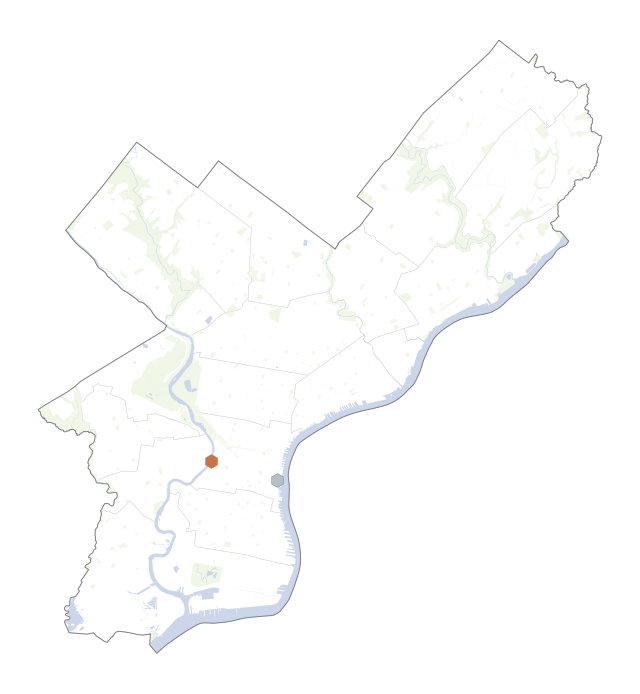

In [32]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

## Base
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

## Scatter plot for 'Philadelphia Vietnam Veterans Memorial'
ax.scatter(vietnam_veterans_memorial['Long'], vietnam_veterans_memorial['Lat'], 
           color='#B4BFC5', edgecolor='grey', marker='h', linewidth=0.3, label='Philadelphia Vietnam Veterans Memorial', s=100)

## Scatter plot for 'Schuylkill Banks'
ax.scatter(schuylkill_banks['Long'], schuylkill_banks['Lat'], 
           color='#CF7041', edgecolor='grey', marker='h', linewidth=0.3, label='Schuylkill Banks', s=100)

# Remove axes spines
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)


plt.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/review_example2.jpg', format='jpg', dpi=300)

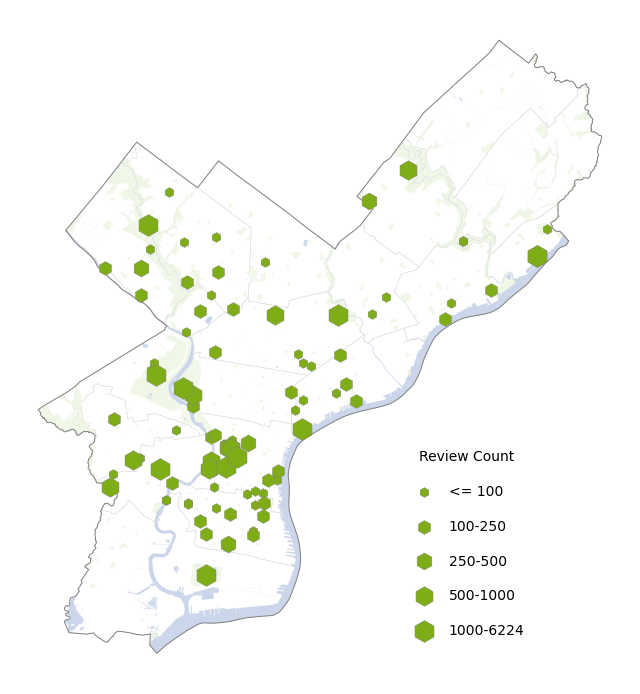

In [56]:
breaks = [0, 100, 250, 500, 1000, max(park_plot['review_count_by_park'])]

# Map review counts to size categories based on custom breaks
def map_size_category(x):
    for i in range(len(breaks) - 1):
        if x <= breaks[i + 1]:
            return (i + 1) * 50  

park_plot['size_category'] = park_plot['review_count_by_park'].apply(map_size_category)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

# Create a scatter plot with hexagonal markers
size_mapping = {
    50: f'<= {breaks[1]}',
    100: f'{breaks[1]}-{breaks[2]}',
    150: f'{breaks[2]}-{breaks[3]}',
    200: f'{breaks[3]}-{breaks[4]}',
    250: f'{breaks[4]}-{breaks[5]}'
}
for size, label in size_mapping.items():
    subset = park_plot[park_plot['size_category'] == size]
    ax.scatter(subset['Long'], subset['Lat'], s=size, label=label, color='#7fad17', edgecolor='grey', marker='h', linewidth=0.3)

# Position the legend at the bottom right
ax.legend(title='Review Count', loc='lower right', bbox_to_anchor=(0.85, 0.05), frameon=False, labelspacing=1.5)

# Remove axes spines
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)

plt.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/review_amounts_over_city2.jpg', format='jpg', dpi=300)
plt.show()

# **Sentiment**

## Apply Model (Raw Chunks - Jump to Load Data Please)

In [ ]:
import os
import glob
import pandas as pd

reviews_df = pd.read_csv('output_files/review_w_sentiment.csv')

## Load Data with Sentiment Score

In [57]:
import os
import glob

reviews_df = pd.read_csv('output_files/review_w_sentiment.csv')


## Correlation

### *Monthly Change*

In [470]:
# Transform Date 

reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])
reviews_df = reviews_df[reviews_df['timestamp'].dt.year >= 2016]

# Extract month and calculate the average sentiment score
reviews_df['month'] = reviews_df['time'].dt.month
monthly_avg_sentiment = reviews_df.groupby('month')['sentiment'].mean().reset_index()

# Create a dictionary to map month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_avg_sentiment['month_name'] = monthly_avg_sentiment['month'].map(month_names)

monthly_avg_sentiment.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [464]:
monthly_stats = reviews_df.groupby('month').agg(mean_sentiment=('sentiment', 'mean'),
                                                std_dev=('sentiment', 'std'),
                                                count=('sentiment', 'size')).reset_index()

monthly_avg_sentiment = monthly_avg_sentiment.merge(monthly_stats[['month', 'std_dev', 'count']], on='month')


KeyError: 'month'

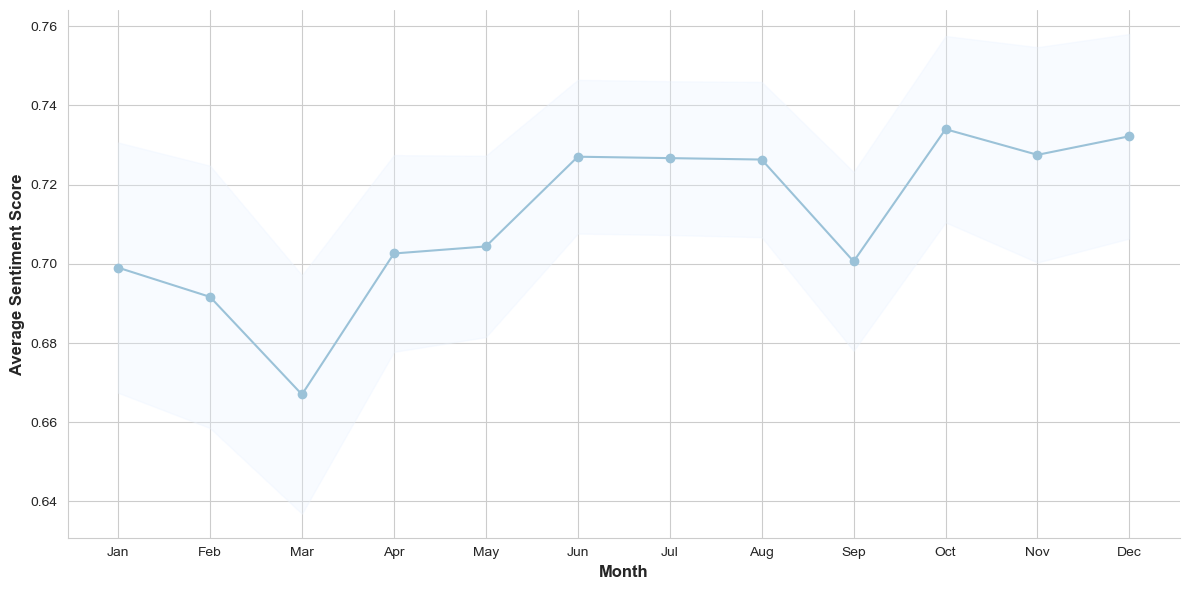

In [471]:
import scipy.stats as stats

monthly_avg_sentiment['ci95_high'] = monthly_avg_sentiment['sentiment'] + 1.96 * (monthly_avg_sentiment['std_dev'] / np.sqrt(monthly_avg_sentiment['count']))
monthly_avg_sentiment['ci95_low'] = monthly_avg_sentiment['sentiment'] - 1.96 * (monthly_avg_sentiment['std_dev'] / np.sqrt(monthly_avg_sentiment['count']))

# Set the style of seaborn
sns.set_style("whitegrid")  # This will create a grid that doesn't overpower the plot

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the mean sentiment score for each month
line = plt.plot(monthly_avg_sentiment['month_name'], monthly_avg_sentiment['sentiment'], marker='o', color='#9BC2D8', label='Average Sentiment Score')

# Add a shaded area for the confidence interval
plt.fill_between(monthly_avg_sentiment['month_name'], monthly_avg_sentiment['ci95_low'], monthly_avg_sentiment['ci95_high'], color='#E9F3FF', alpha=0.3)

# Customize the ticks on the x-axis to show abbreviated month names
plt.xticks(ticks=range(len(monthly_avg_sentiment['month_name'])), labels=monthly_avg_sentiment['month_name'], rotation=0)

# Add Labels and title
plt.xlabel('Month', fontsize=12, weight='bold')
plt.ylabel('Average Sentiment Score', fontsize=12, weight='bold')
#plt.title('Average Sentiment Score with 95% Confidence Interval by Month', fontsize=14, weight='bold')

# Despine the plot to remove the right and top lines for a cleaner look
sns.despine()

# Improve Layout
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/sentiment_over_months_notitle.jpg', format='jpg', dpi=300)

### *Annual Change*

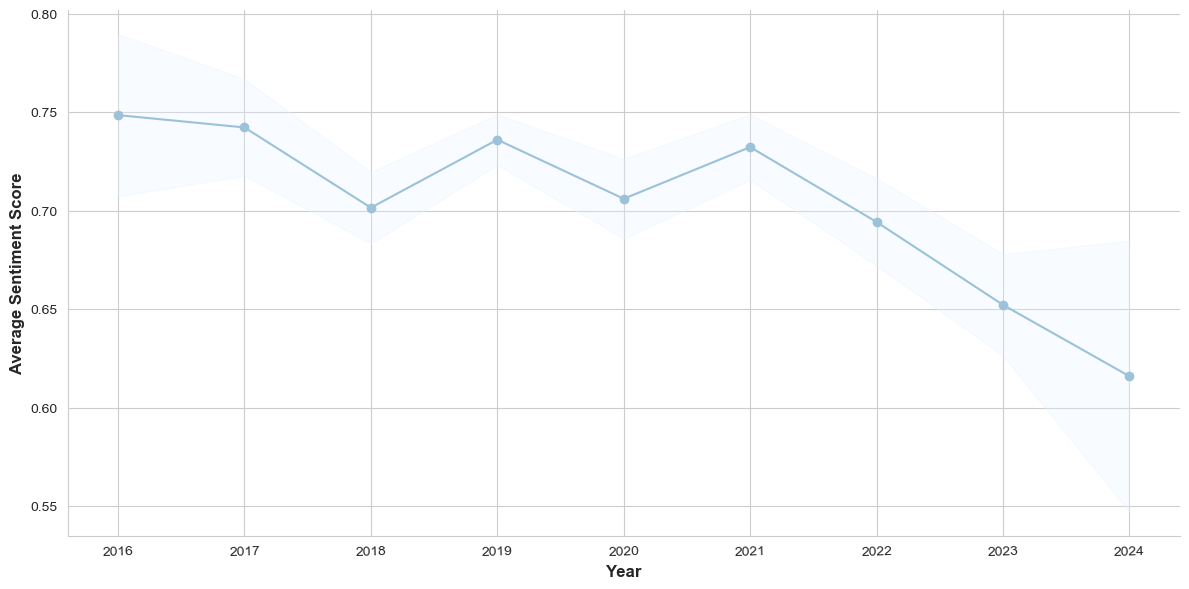

In [253]:
from scipy.stats import t
sns.set_style("whitegrid")
reviews_df['time'] = pd.to_datetime(reviews_df['time'])
reviews_df['year'] = reviews_df['time'].dt.year

# Group by year and calculate mean, count, and standard deviation
annual_data = reviews_df.groupby('year')['sentiment'].agg(['mean', 'count', 'std']).reset_index()

# Calculate the Standard Error and Confidence Intervals
annual_data['se'] = annual_data['std'] / np.sqrt(annual_data['count'])
annual_data['ci95'] = t.ppf(0.975, annual_data['count']-1) * annual_data['se']

# Adding columns for the lower and upper confidence limits
annual_data['lower_ci'] = annual_data['mean'] - annual_data['ci95']
annual_data['upper_ci'] = annual_data['mean'] + annual_data['ci95']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(annual_data['year'], annual_data['mean'], marker='o', color='#9BC2D8', label='Average Sentiment Score')
plt.fill_between(annual_data['year'], annual_data['lower_ci'], annual_data['upper_ci'], color='#E9F3FF', alpha=0.3)
plt.xticks(annual_data['year'].unique(), rotation=2)  # Ensure unique years are listed on x-axis
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Average Sentiment Score', fontsize=12, weight='bold')
#plt.title('Average Sentiment Score with 95% Confidence Interval by Year', fontsize=14, weight='bold')
sns.despine()
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/sentiment_over_year.jpg', format='jpg', dpi=300)

### *Variation from Functions*

In [137]:
print(reviews_df['ParkName'])

0                   Delancey Park
1                   Delancey Park
2                   Delancey Park
3                   Delancey Park
4                   Delancey Park
                   ...           
37209    Giuseppe Bardascino Park
37210    Giuseppe Bardascino Park
37211    Giuseppe Bardascino Park
37212    Giuseppe Bardascino Park
37213    Giuseppe Bardascino Park
Name: ParkName, Length: 37016, dtype: object


In [58]:
def define_function(park_name):
    if isinstance(park_name, str):
        lower_park_name = park_name.lower()
        if 'playground' in lower_park_name:
            return 'Playground'
        elif 'court' in lower_park_name or 'tennis' in lower_park_name:
            return 'Sport Court'
        elif 'banks' in lower_park_name or 'river' in lower_park_name or 'creek' in lower_park_name:
            return 'Watershed Park'
        elif 'memorial' in lower_park_name:
            return 'Memorial Park'
        elif 'square' in lower_park_name:
            return 'Sqaure'
        elif 'valley' in lower_park_name:
            return 'Natural Reservation'
        else:
            return 'Regular'

# Assuming 'reviews_df' is your dataframe and 'ParkName' is the column with park names
reviews_df['Function'] = reviews_df['ParkName'].apply(define_function)

In [59]:
reviews_df.head()

timestamp              author                user_id  \
0  12/30/2023 19:08:54     Eleni Belisonzi  106030427780813104531   
1  08/14/2023 17:51:59      Marta Harrison  116743363301808220011   
2  06/06/2023 11:43:07  Akshita Srivastava  111921958911249462562   
3  04/20/2023 20:58:42        Andy Reinoso  116446471570828426598   
4  03/20/2023 22:03:31       Moaaz Marzouk  110355050307790944461   

                                         review_text  rating  \
0                                  A neighbor jewel.       5   
1  visited in a nostalgia trip, as I took my todd...       4   
2       Hung out in peace, great for solitude lovers       5   
3  Nice little park in the middle of old historic...       4   
4                          Nice small place for kids       4   

                      place_id       ParkName       Lat     Long  \
0  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
1  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
2  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
3  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
4  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   

                  time                                 review_predictions  \
0  2023-12-30 19:08:54  [{'label': 'POSITIVE', 'score': 0.995235741138...   
1  2023-08-14 17:51:59  [{'label': 'POSITIVE', 'score': 0.999670982360...   
2  2023-06-06 11:43:07  [{'label': 'POSITIVE', 'score': 0.999643683433...   
3  2023-04-20 20:58:42  [{'label': 'POSITIVE', 'score': 0.999513149261...   
4  2023-03-20 22:03:31  [{'label': 'POSITIVE', 'score': 0.999785721302...   

  review_label  review_score  sentiment Function  
0     POSITIVE      0.995236   0.995236  Regular  
1     POSITIVE      0.999671   0.999671  Regular  
2     POSITIVE      0.999644   0.999644  Regular  
3     POSITIVE      0.999513   0.999513  Regular  
4     POSITIVE      0.999786   0.999786  Regular

C:\Users\gaoxi\AppData\Local\Temp\ipykernel_18880\1119212255.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(y='Function', x='mean', data=function_stats, ci=None, color='#9BC2D8')


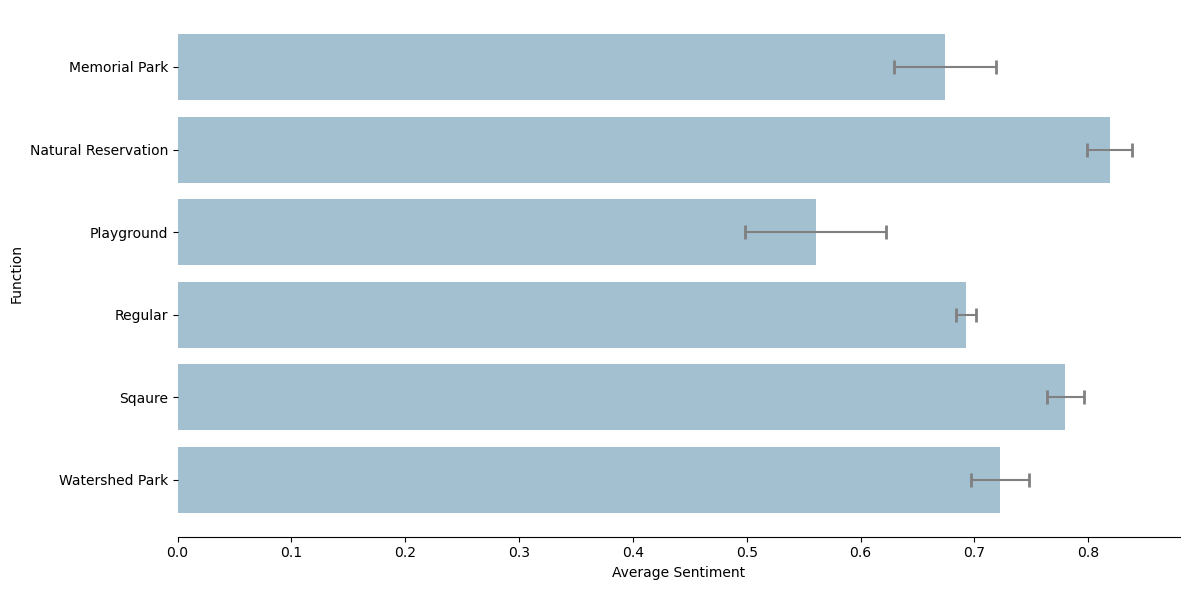

In [61]:

function_stats = reviews_df.groupby('Function')['sentiment'].agg(['mean', 'std', 'count']).reset_index()

# Calculate the 95% confidence interval for the mean sentiment
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # two-tailed z-score for 95% confidence
function_stats['ci95_high'] = function_stats['mean'] + (z_score * function_stats['std'] / np.sqrt(function_stats['count']))
function_stats['ci95_low'] = function_stats['mean'] - (z_score * function_stats['std'] / np.sqrt(function_stats['count']))

# Now plot with confidence intervals
fig, ax = plt.subplots(figsize=(12, 6))
barplot = sns.barplot(y='Function', x='mean', data=function_stats, ci=None, color='#9BC2D8')

# Add error bars for the confidence intervals manually
for index, row in function_stats.iterrows():
    plt.errorbar(y=index, x=row['mean'], xerr=[[row['mean'] - row['ci95_low']], [row['ci95_high'] - row['mean']]],
                 fmt='none', c='gray', capsize=5, capthick=2)

sns.despine(left=True)  
plt.xticks(rotation=0)  
plt.xlabel('Average Sentiment')
plt.ylabel('Function')
#plt.title('Average Sentiment Score by Park Function with 95% CI')

# Show the plot
plt.tight_layout()
plt.show()

fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/sentiment_by_function_notitle2.jpg', format='jpg', dpi=300)


### *Sentiment Map*

In [472]:
average_sentiments = reviews_df.groupby('ParkName').agg({'sentiment': 'mean'})
#park_plot = reviews_df.drop_duplicates(subset='ParkName')[['ParkName', 'Long', 'Lat']]
park_plot = park_plot.merge(average_sentiments, on='ParkName', how='left')

park_plot.head()
#len(park_plot)

ParkName       Long        Lat  \
0                             Delancey Park -75.147900  39.944080   
1                            Mifflin Square -75.156519  39.919477   
2                       William Lanier Park -75.193880  39.933620   
3  Marian Winfield Hissey Recreation Center -75.123340  39.994330   
4                               Palmer Park -75.132540  39.974890   

   review_count_by_park                    geometry  size_category  \
0                   102  POINT (-75.14790 39.94408)            100   
1                   165  POINT (-75.15652 39.91948)            100   
2                    80  POINT (-75.19388 39.93362)             50   
3                    50  POINT (-75.12334 39.99433)             50   
4                    86  POINT (-75.13254 39.97489)             50   

   sentiment_x  weighted_average_sentiment  Discovery_percentage  \
0     0.819293                    0.824534                  8.82   
1     0.264519                    0.376713                  5.45   
2     0.606904                    0.572073                  8.75   
3     0.294164                    0.132645                  6.00   
4     0.776113                    0.820867                 13.95   

   Engagement_percentage  ...  Relaxation_percentage  Sorrow_percentage  \
0                   0.98  ...                  72.55               0.00   
1                   1.21  ...                  46.67               0.61   
2                   0.00  ...                  65.00               0.00   
3                   2.00  ...                  56.00               0.00   
4                   0.00  ...                  60.47               0.00   

   Discovery_percentage_weighted  Engagement_percentage_weighted  \
0                           7.98                            0.40   
1                           4.40                            0.69   
2                           9.31                            0.00   
3                           6.07                            0.29   
4                          12.29                            0.00   

   Frustration & Annoyance_percentage_weighted  \
0                                         0.00   
1                                         0.96   
2                                         0.00   
3                                         0.00   
4                                         7.12   

   Inspiration_percentage_weighted  Relaxation_percentage_weighted  \
0                            17.45                           74.17   
1                            45.09                           48.77   
2                            24.54                           66.15   
3                            32.59                           61.05   
4                            14.88                           65.71   

   Sorrow_percentage_weighted  Dominant_Emotion_weighted  sentiment_y  
0                        0.00                 Relaxation     0.819293  
1                        0.08                 Relaxation     0.264519  
2                        0.00                 Relaxation     0.606904  
3                        0.00                 Relaxation     0.294164  
4                        0.00                 Relaxation     0.776113  

[5 rows x 22 columns]

In [487]:
# Sort the DataFrame by 'sentiment_x' and 'weighted_average_sentiment' in descending order
sorted_park_plot = park_plot.sort_values(by=['Discovery_percentage_weighted'], ascending=True)

# Display the sorted DataFrame
sorted_park_plot. head(15)

ParkName       Long        Lat  \
76    Philadelphia Vietnam Veterans Memorial -75.142773  39.943987   
44                     Emanuel Weinberg Park -75.156526  39.921253   
91                     Frank Palumbo Sr Park -75.155587  39.939260   
39            Frankford and Solly Playground -75.079913  40.024715   
92                  Giuseppe Bardascino Park -75.159919  39.937796   
67                           Weccacoe Square -75.150634  39.938151   
45                 Belmont and Edgley Fields -75.213776  39.995501   
79  Devereaux Ave Trailhead at K and T Trail -75.206924  39.935125   
78       Bartrams Mile Trail Greenway (56th) -75.206924  39.935125   
23                             Konrad Square -75.127995  39.979319   
53                         Ralph Brooks Park -75.177697  39.931445   
72                           Overington Park -75.088280  40.016999   
63                           Harrowgate Park -75.106369  39.999218   
16           Norman (Butch) Ellis Playground -75.200936  39.965954   
1                             Mifflin Square -75.156519  39.919477   

    review_count_by_park                    geometry  size_category  \
76                    43  POINT (-75.14277 39.94399)             50   
44                    24  POINT (-75.15653 39.92125)             50   
91                    27  POINT (-75.15559 39.93926)             50   
39                    71  POINT (-75.07991 40.02472)             50   
92                    42  POINT (-75.15992 39.93780)             50   
67                    41  POINT (-75.15063 39.93815)             50   
45                    31  POINT (-75.21378 39.99550)             50   
79                    56  POINT (-75.20692 39.93512)             50   
78                    56  POINT (-75.20692 39.93512)             50   
23                    68  POINT (-75.12799 39.97932)             50   
53                    37  POINT (-75.17770 39.93144)             50   
72                    88  POINT (-75.08828 40.01700)             50   
63                   139  POINT (-75.10637 39.99922)            100   
16                    35  POINT (-75.20094 39.96595)             50   
1                    165  POINT (-75.15652 39.91948)            100   

    sentiment_x  weighted_average_sentiment  Discovery_percentage  \
76     0.818981                    0.699100                  2.33   
44     0.416422                    0.257931                  4.17   
91     0.928232                    0.940616                  7.41   
39    -0.009312                    0.272465                  4.23   
92     0.571604                    0.760506                  9.52   
67     0.384816                    0.338532                  2.44   
45     0.418373                    0.245590                  6.45   
79     0.869822                    0.922574                  7.14   
78     0.869822                    0.922574                  7.14   
23     0.669891                    0.594486                  8.82   
53     0.876732                    0.911418                  5.41   
72     0.675736                    0.650648                  5.68   
63     0.419615                    0.576568                  7.91   
16     0.469540                    0.741364                  5.71   
1      0.264519                    0.376713                  5.45   

    Engagement_percentage  ...  Relaxation_percentage  Sorrow_percentage  \
76                   2.33  ...                  60.47               2.33   
44                   0.00  ...                  37.50               0.00   
91                   0.00  ...                  85.19               0.00   
39                   0.00  ...                  23.94               0.00   
92                   0.00  ...                  61.90               0.00   
67                   0.00  ...                  70.73               0.00   
45                   6.45  ...                  48.39               0.00   
79                   0.00  ...                  75.00            

In [488]:
park_plot.to_csv('output_files/parkplot_final.csv', index=False)

In [473]:
breaks = [0, 100, 250, 500, 1000, max(park_plot['review_count_by_park'])]

# Map review counts to size categories based on custom breaks
def map_size_category(x):
    for i in range(len(breaks) - 1):
        if x <= breaks[i + 1]:
            return (i + 1) * 50  # Increment size for each category

park_plot['size_category'] = park_plot['review_count_by_park'].apply(map_size_category)


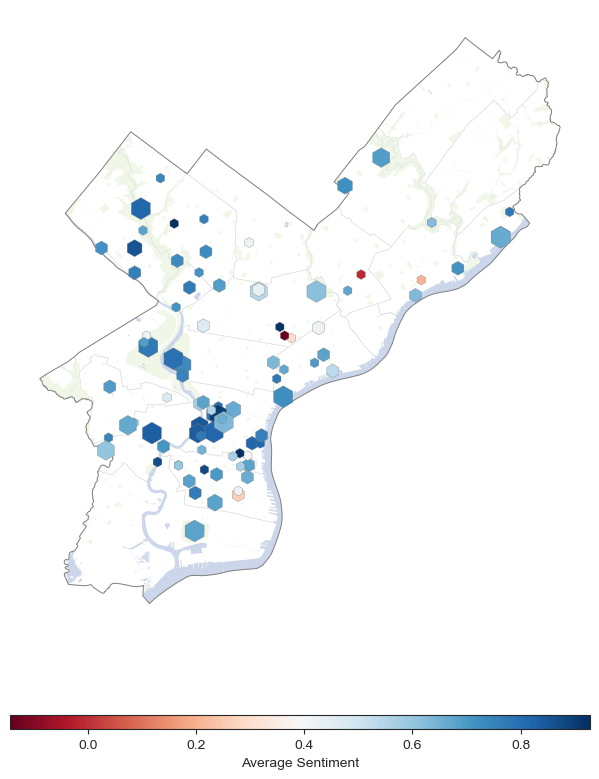

In [164]:
# Define custom breaks and corresponding sizes
breaks = [0, 100, 250, 500, 1000, max(park_plot['review_count_by_park'])]
sizes = [50, 100, 150, 200, 250]  # Sizes corresponding to each break interval

def map_size_category(x):
    for i, break_point in enumerate(breaks):
        if x <= break_point:
            return sizes[i]
    return sizes[-1]

sns.set_style('white')

fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)


sc = sns.scatterplot(data=park_plot, x='Long', y='Lat', hue='sentiment',
                     palette='RdBu', size='size_category', sizes=(50, 250),
                     ax=ax, edgecolor='grey',  linewidth=0.25, marker = 'h', legend=False)


# Color bar for sentiment
norm = plt.Normalize(park_plot['sentiment'].min(), park_plot['sentiment'].max())
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Average Sentiment')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25])  # Positioning color bar at bottom right



# Customize layout
ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/sentiment_mapping2.jpg', format='jpg', dpi=300)


### *Sentiment Map with Weight*

In [165]:
from datetime import datetime

reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])

# Define a function to calculate weights based on exponential decay
def calculate_weights(dates, half_life='365 days'):
    """Calculate exponential decay weights for a series of dates."""
    # Get the number of days ago each review was made
    days_ago = (datetime.now() - dates).dt.days
    # Calculate weights using exponential decay
    weights = 0.5 ** (days_ago / pd.to_timedelta(half_life).days)
    return weights

# Calculate weights for each review
reviews_df['weights'] = calculate_weights(reviews_df['timestamp'])

In [166]:
weighted_averages = reviews_df.groupby('ParkName').apply(
    lambda x: (x['sentiment'] * x['weights']).sum() / x['weights'].sum() if x['weights'].sum() > 0 else None
)

C:\Users\gaoxi\AppData\Local\Temp\ipykernel_31340\3005403634.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_averages = reviews_df.groupby('ParkName').apply(


In [167]:
reviews_df.head(50)

timestamp                         author                user_id  \
0  2023-12-30 19:08:54                Eleni Belisonzi  106030427780813104531   
1  2023-08-14 17:51:59                 Marta Harrison  116743363301808220011   
2  2023-06-06 11:43:07             Akshita Srivastava  111921958911249462562   
3  2023-04-20 20:58:42                   Andy Reinoso  116446471570828426598   
4  2023-03-20 22:03:31                  Moaaz Marzouk  110355050307790944461   
5  2023-01-06 21:14:44                   Lester Cohen  107353926374783914199   
6  2023-01-02 15:16:01                   Amy Ortiz 26  108848103542446569197   
7  2022-08-29 22:52:54                     Anna D. W.  103595414781637477967   
8  2022-07-12 02:43:38                Fanny MAREMBERT  101124383420107000567   
9  2022-05-08 18:57:46                      Alice Lee  111348396730569919746   
10 2022-05-04 16:02:02                        KGQ NYC  118441423463551375735   
11 2022-04-29 15:13:18                 Chris Anderson  103681821714175764547   
12 2022-04-16 13:33:24                    Jordan Cole  103901982222407868110   
13 2021-12-13 05:15:06                  Logan Duranto  108794116139921276846   
14 2021-10-30 12:24:15                       Jeremy B  109581469751692316204   
15 2021-10-20 18:21:57               Luke Sondergaard  102520574167486358626   
16 2021-08-26 13:14:49                      JJ Garcia  114405617996208682037   
17 2021-07-26 00:12:46                   Rick Bergami  108023341474362637485   
18 2021-06-17 00:22:26            Charles Cadwallader  100634052849765396783   
19 2021-06-01 00:42:44               Lizmarie Oquendo  116619058479309620540   
20 2021-05-06 20:50:03                  Lenka Bergami  102080610740064700316   
21 2021-05-02 17:55:52                 Vanessa Wagner  101688119571529224316   
22 2021-04-24 17:12:37                  Damaso Sostre  110935740275432023306   
23 2021-04-10 18:39:24                Steven Krupnick  100337148758019612812   
24 2021-03-27 18:55:43                     Zuxian Shi  104579359978222307612   
25 2021-03-24 01:52:04                    Elena Korol  104677336632519681396   
26 2021-01-02 17:33:48              Mario Christianto  112114361095924881524   
27 2020-12-26 12:23:18           Yevgeniy Kaganovskiy  111571582843943465392   
28 2020-11-09 23:58:11                 Andrew Marques  112556012731847029296   
29 2020-10-28 17:58:28                          Kinga  117531092743018138497   
30 2020-10-18 14:12:24                Diane McConnell  105107624850039889130   
31 2020-10-12 01:29:59              Michele Perlstein  108751905346460811745   
32 2020-10-04 21:45:53                        Krystal  103700461091754121327   
33 2020-09-07 03:05:52                     Dan Reamer  109094773256399262308   
34 2020-09-05 19:18:19                    Keegan Tawa  101021406322683896289   
35 2020-08-06 20:51:19                Jennifer Valdez  107548342557936009119   
36 2020-07-17 21:54:53                    maria Duran  105975422085464868686   
37 2020-04-15 20:26:12  Barb Hauck-Mah (barbhmphilly)  116895998071761886932   
38 2020-02-26 03:05:15                   Fausta Faggi  103200167106498843440   
39 2020-02-25 16:42:39          Bret Lafty (BretL835)  111567349734951730996   
40 2020-02-07 18:11:37              Rebecca Schneider  116412677837414094685   
41 2020-02-04 00:44:34                          Ricky  116562216545867453942   
42 2020-02-01 22:39:18                   Fawn Lisette  105424988072937667726   
43 2020-01-14 22:56:51                    Ben Samways  113472040624901921028   
44 2020-01-10 17:32:24                 Stephanie Bell  105193292918460493001   
45 2019-12-08 17:48:46                   Erika Becker  112562369314689009702   
46 2019-11-13 03:30:18                        vy pham  102987250489071291025   
47 2019-10-31 23:59:26                    Mary Harris  110984816977903685330   
48 2019-10-16 02:26:04                  Chet Donnally  109809242469782910235   
49 2019-10-06

In [168]:
weighted_averages_df = weighted_averages.reset_index(name='weighted_average_sentiment')
park_plot = park_plot.merge(weighted_averages_df, on='ParkName', how='left')

park_plot.head()

ParkName       Long        Lat  \
0                             Delancey Park -75.147900  39.944080   
1                            Mifflin Square -75.156519  39.919477   
2                       William Lanier Park -75.193880  39.933620   
3  Marian Winfield Hissey Recreation Center -75.123340  39.994330   
4                               Palmer Park -75.132540  39.974890   

   review_count_by_park                    geometry  size_category  sentiment  \
0                   102  POINT (-75.14790 39.94408)            100   0.819293   
1                   165  POINT (-75.15652 39.91948)            100   0.264519   
2                    80  POINT (-75.19388 39.93362)             50   0.606904   
3                    50  POINT (-75.12334 39.99433)             50   0.294164   
4                    86  POINT (-75.13254 39.97489)             50   0.776113   

   weighted_average_sentiment  
0                    0.824534  
1                    0.376713  
2                    0.572073  
3                    0.132645  
4                    0.820867

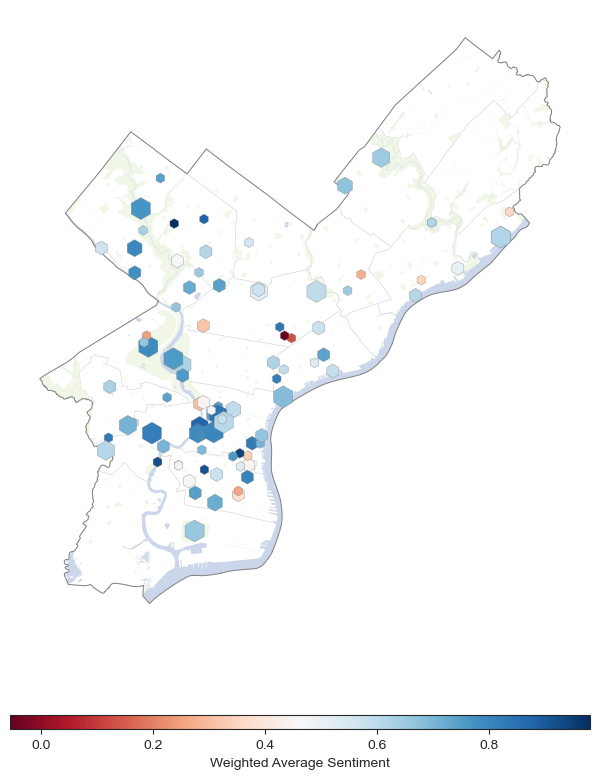

In [169]:
# Define custom breaks and corresponding sizes
breaks = [0, 100, 250, 500, 1000, max(park_plot['review_count_by_park'])]
sizes = [50, 100, 150, 200, 250]  # Sizes corresponding to each break interval

def map_size_category(x):
    for i, break_point in enumerate(breaks):
        if x <= break_point:
            return sizes[i]
    return sizes[-1]

sns.set_style('white')

fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)


sc = sns.scatterplot(data=park_plot, x='Long', y='Lat', hue='weighted_average_sentiment',
                     palette='RdBu', size='size_category', sizes=(50, 250),
                     ax=ax, edgecolor='grey',  linewidth=0.25, marker = 'h', legend=False)


# Color bar for sentiment
norm = plt.Normalize(park_plot['weighted_average_sentiment'].min(), park_plot['weighted_average_sentiment'].max())
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Average Sentiment')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25])  # Positioning color bar at bottom right



# Customize layout
ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/weighted_sentiment_mapping2.jpg', format='jpg', dpi=300)

# **Emotions**

## Apply 28 emotion labels model (Raw Chunks - Jump to Load Data Please)

In [ ]:
len(reviews_df)

## Load Reviews DF with Emotions

In [25]:
import pandas as pd

reviews_df = pd.read_csv('output_files/review_w_emotions_seperated.csv')
reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])
reviews_df = reviews_df[reviews_df['timestamp'].dt.year >= 2016]

reviews_df.head()

timestamp              author                user_id  \
0 2023-12-30 19:08:54     Eleni Belisonzi  106030427780813104531   
1 2023-08-14 17:51:59      Marta Harrison  116743363301808220011   
2 2023-06-06 11:43:07  Akshita Srivastava  111921958911249462562   
3 2023-04-20 20:58:42        Andy Reinoso  116446471570828426598   
4 2023-03-20 22:03:31       Moaaz Marzouk  110355050307790944461   

                                         review_text  rating  \
0                                  A neighbor jewel.       5   
1  visited in a nostalgia trip, as I took my todd...       4   
2       Hung out in peace, great for solitude lovers       5   
3  Nice little park in the middle of old historic...       4   
4                          Nice small place for kids       4   

                      place_id       ParkName       Lat     Long  \
0  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
1  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
2  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
3  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
4  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   

                  time  ...      love nervousness   neutral  optimism  \
0  2023-12-30 19:08:54  ...  0.001176    0.000392  0.968586  0.001877   
1  2023-08-14 17:51:59  ...  0.021185    0.002070  0.046001  0.004074   
2  2023-06-06 11:43:07  ...  0.037376    0.000512  0.088383  0.004414   
3  2023-04-20 20:58:42  ...  0.002987    0.000345  0.158318  0.009164   
4  2023-03-20 22:03:31  ...  0.002805    0.000106  0.056614  0.005207   

      pride  realization    relief   remorse   sadness  surprise  
0  0.000380     0.005319  0.000340  0.000415  0.002123  0.001158  
1  0.014304     0.033353  0.027964  0.000763  0.004404  0.002918  
2  0.010218     0.006221  0.008279  0.000474  0.004261  0.000506  
3  0.007238     0.011970  0.005709  0.000175  0.001040  0.000501  
4  0.002069     0.005965  0.000588  0.000234  0.000922  0.000758  

[5 rows x 42 columns]

In [26]:
from datetime import datetime

reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])

# Define a function to calculate weights based on exponential decay
def calculate_weights(dates, half_life='365 days'):
    """Calculate exponential decay weights for a series of dates."""
    # Get the number of days ago each review was made
    days_ago = (datetime.now() - dates).dt.days
    # Calculate weights using exponential decay
    weights = 0.5 ** (days_ago / pd.to_timedelta(half_life).days)
    return weights

# Calculate weights for each review
reviews_df['weights'] = calculate_weights(reviews_df['timestamp'])

## New Emotion Index: K-means

### *Regular K Means, not chosen*

In [27]:
emotion_columns = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "love", "nervousness", "neutral", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise"
]
emotion_data = reviews_df[emotion_columns]

# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')
emotion_data_imputed = imputer.fit_transform(emotion_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=0).fit(emotion_data_imputed)  # Adjust the number of clusters as needed

# Get the cluster labels for each row
reviews_df['cluster'] = kmeans.labels_

# Analyze the centroids to see which emotions are frequently grouped together
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=emotion_columns)

print("Cluster centroids:\n", centroids)
print("\nData with cluster labels:\n", reviews_df.head())

D:\Anaconda\Install\envs\musa-550-fall-2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centroids:
    admiration  amusement     anger  annoyance  approval    caring  confusion  \
0    0.094796   0.098833  0.002691   0.009960  0.072526  0.017054   0.018236   
1    0.101100   0.002366  0.005283   0.011929  0.141170  0.650263   0.002910   
2    0.905540   0.004511  0.001355   0.003898  0.076828  0.003984   0.002532   
3    0.101997   0.003532  0.001694   0.011420  0.361926  0.026660   0.006803   
4    0.009900   0.002596  0.003234   0.013161  0.050753  0.005781   0.003826   
5    0.106156   0.006288  0.003788   0.005250  0.045490  0.009126   0.003853   
6    0.042123   0.003962  0.038569   0.168363  0.033087  0.005335   0.011436   
7    0.670877   0.005994  0.002319   0.003654  0.065561  0.006886   0.003348   
8    0.588366   0.021216  0.002044   0.009491  0.199006  0.017080   0.005816   
9    0.287576   0.008282  0.002241   0.008549  0.029813  0.013695   0.003803   

   curiosity    desire  disappointment  ...      love  nervousness   neutral  \
0   0.021776  0.038

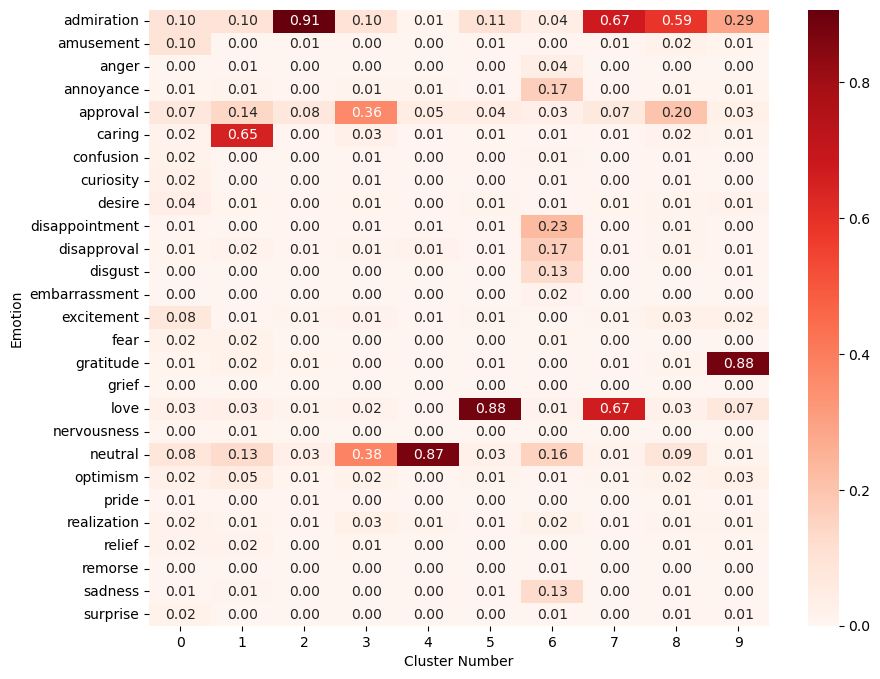

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'centroids' is your DataFrame from the cluster analysis
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=emotion_columns)

# Round the values for better readability
centroids_rounded = centroids.round(3)

# Display the DataFrame as a heatmap for visual clarity
fig=plt.figure(figsize=(10, 8))
sns.heatmap(centroids_rounded.T, cmap="Reds", annot=True, fmt=".2f")  
#plt.title('Cluster Centroids for Emotions')
plt.xlabel('Cluster Number')
plt.ylabel('Emotion')
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/kmeans_noPCA.jpg', format='jpg', dpi=300)

### *K Means with PCA*

In [27]:
#!pip install sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Select the emotion columns from your DataFrame
emotion_columns = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "love", "nervousness", "neutral", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise"
]
emotion_data = reviews_df[emotion_columns]

# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')
emotion_data_imputed = imputer.fit_transform(emotion_data)

# Scale the data
scaler = StandardScaler()
emotion_data_scaled = scaler.fit_transform(emotion_data_imputed)


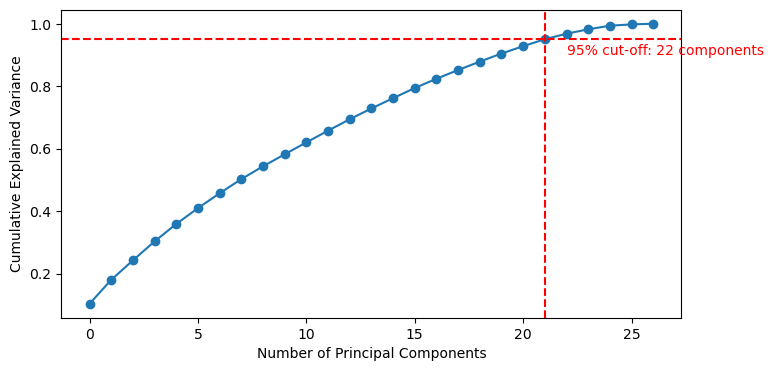

In [28]:
# Apply PCA without reducing dimensionality
pca = PCA()
pca.fit(emotion_data_scaled)

# Calculate cumulative variance explained by the components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Plot the cumulative variance explained
fig=plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components_95 - 1, color='r', linestyle='--')
plt.text(n_components_95, 0.90, '95% cut-off: {} components'.format(n_components_95), color = "red")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
#plt.title('Explained Variance by PCA Components')
plt.show()

fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/pca.jpg', format='jpg', dpi=300)

# Now you can run PCA again with the optimal number of components if needed
pca_optimal = PCA(n_components=n_components_95)
emotion_data_pca = pca_optimal.fit_transform(emotion_data_scaled)

D:\Anaconda\Install\envs\musa-550-fall-2023\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Anaconda\Install\envs\musa-550-fall-2023\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


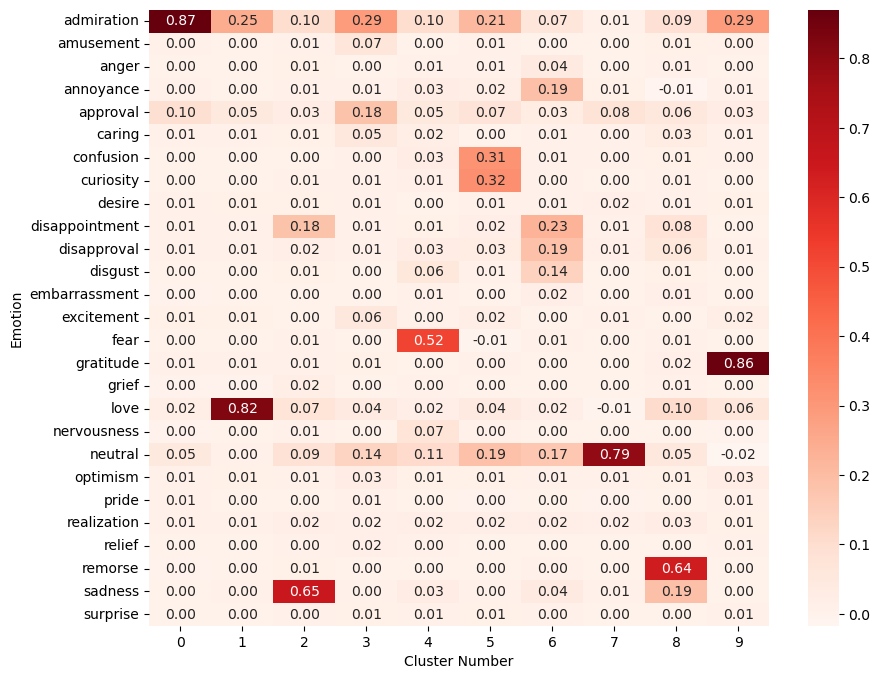

In [29]:
# Apply PCA
pca = PCA(n_components=22) 
emotion_data_pca = pca.fit_transform(emotion_data_scaled)

# Perform K-means clustering with a higher number of clusters and different initialization
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)
kmeans.fit(emotion_data_pca) 

# Attach cluster labels to the DataFrame
reviews_df['cluster'] = kmeans.labels_

# Analyze the centroids again
centroids = pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_)), columns=emotion_columns)
centroids_rounded = centroids.round(3)

# Display the centroids as a heatmap
fig=plt.figure(figsize=(10, 8))
sns.heatmap(centroids_rounded.T, cmap="Reds", annot=True, fmt=".2f")  
#plt.title('Cluster Centroids for Emotions')
plt.xlabel('Cluster Number')
plt.ylabel('Emotion')
plt.show()

fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/kmeans.jpg', format='jpg', dpi=300)

D:\Anaconda\Install\envs\musa-550-fall-2023\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


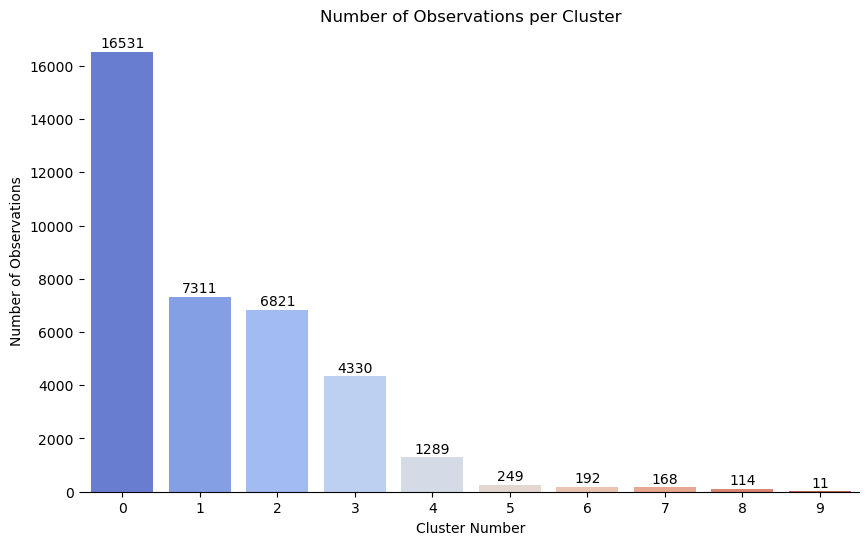

In [30]:
## clsuter counts 
cluster_counts = reviews_df['cluster'].value_counts()

### plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(cluster_counts))), y=cluster_counts, palette='coolwarm')
plt.title('Number of Observations per Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)

# Adding the text labels on the bars
for i, v in enumerate(cluster_counts):
    plt.text(i, v + 50, str(v), color='black', ha='center', va='bottom') 
ax = plt.gca() 
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_visible(True) 
ax.spines['left'].set_visible(False)
plt.show()

# Save the figure
#plt.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/observation_per_cluster.jpg', format='jpg', dpi=300)



### *Mannualy Combine and Name New Emotion Index*

**Discovery (Cluster 1 & 2):**

Cluster 1 predominantly features curiosity (0.33), confusion (0.32), admiration (0.20), and neutral (0.19), representing an eagerness to explore and learn new things during a park visit. 

Cluster 2 is characterized by surprise (0.58),  admiration (0.24), and excitement (0.15), reflecting the unexpected delights and discoveries that enhance the park experience.

**Relaxation (Clusters 3 & 0):**

Cluster 3 is mainly neutral (0.81), indicating a calm and relaxed state that park visitors often experience in the tranquil settings. 

Cluster 0 includes admiration (0.30) and approval (0.27), emotions that reflect a positive reception and appreciation of the park’s natural beauty and amenities.

**Engagement (Cluster 5):**

This cluster defines a feelings of entertainment , shown through amusement (0.38) and admiration (0.19). It suggests that visitors happiness related to the entertainment during park visitinf
**Inspiration (Cluster 6,7):**

This cluster is defined by strong feelings of happiness, shown through love (0.82) and admiration (0.82). It suggests that visitors feel a deep connection and satisfaction with their experiences in the park, often leading to memorable and fulfilling visits.

**Frustration & Annoyance (Cluster 4, 9):**

Cluster 4 and 9 together capture the less positive aspects of park visits, with cluster 4 including disappointment (0.23), disapproval (0.19), annoyance (0.19), likely stemming from unmet expectations or negative encounters. Cluster 9 enhances this grouping by focusing on similar feelings of frustration and annoyance.

**Sorrow (Cluster 8):**

Cluster 8 is dominated by sadness (0.63) and disappointment (0.18), which may reflect emotional responses to poignant memories or contemplative moments within the park. This cluster captures the more introspective and solemn experiences visitors might have, possibly in relation to memorial sites or quiet, reflective spaces.

In [31]:
emotion_mapping = {
    0: 'Relaxation',
    1: 'Discovery',
    2: 'Discovery',
    3: 'Relaxation',
    4: 'Frustration & Annoyance',
    5: 'Engagement',
    6: 'Inspiration',
    7: 'Inspiration',
    8: 'Sorrow',
    9: 'Frustration & Annoyance'
}

# Apply the mapping to the cluster column to create the new_emotion column
reviews_df['new_emotion'] = reviews_df['cluster'].map(emotion_mapping)

In [32]:
reviews_df.head()

reviews_df.to_csv('output_files/review_final_final.csv', index=False)

In [33]:
reviews_df = pd.read_csv('output_files/review_final_final.csv')

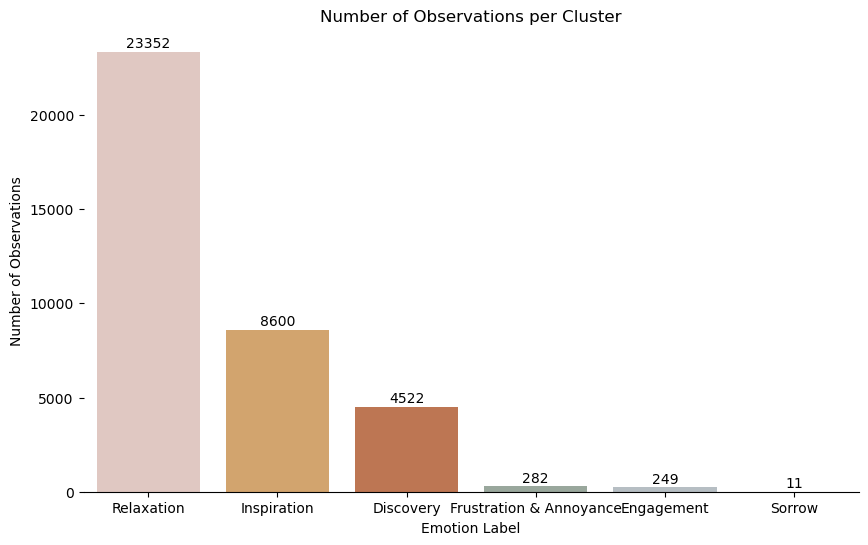

In [71]:
## new clsuter counts 
new_cluster_counts = reviews_df['new_emotion'].value_counts()

# Define the color mapping based on new emotions
color_palette = {
    'Inspiration': '#E2A55E',
    'Relaxation': '#E5C5BD',
    'Frustration & Annoyance': '#96AA9A',
    'Engagement': '#B4BFC5',
    'Discovery': '#CF7041',
    'Sorrow': '#5E718B'
}

# Create a list of colors in the order of the bar plot
colors = [color_palette[emotion] for emotion in new_cluster_counts.index]

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=new_cluster_counts.index, y=new_cluster_counts.values, palette=colors)
plt.title('Number of Observations per Cluster')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)

# Adding the text labels for each bar
for i, v in enumerate(new_cluster_counts):
    plt.text(i, v + 50, str(v), color='black', ha='center', va='bottom') 
ax = plt.gca() 
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_visible(True) 
ax.spines['left'].set_visible(False)
plt.show()

#plt.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/observation_per_new_cluster.jpg', format='jpg', dpi=300)

In [34]:
reviews_df.head()

timestamp              author                user_id  \
0  2023-12-30 19:08:54     Eleni Belisonzi  106030427780813104531   
1  2023-08-14 17:51:59      Marta Harrison  116743363301808220011   
2  2023-06-06 11:43:07  Akshita Srivastava  111921958911249462562   
3  2023-04-20 20:58:42        Andy Reinoso  116446471570828426598   
4  2023-03-20 22:03:31       Moaaz Marzouk  110355050307790944461   

                                         review_text  rating  \
0                                  A neighbor jewel.       5   
1  visited in a nostalgia trip, as I took my todd...       4   
2       Hung out in peace, great for solitude lovers       5   
3  Nice little park in the middle of old historic...       4   
4                          Nice small place for kids       4   

                      place_id       ParkName       Lat     Long  \
0  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
1  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
2  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
3  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
4  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   

                  time  ...  optimism     pride  realization    relief  \
0  2023-12-30 19:08:54  ...  0.001877  0.000380     0.005319  0.000340   
1  2023-08-14 17:51:59  ...  0.004074  0.014304     0.033353  0.027964   
2  2023-06-06 11:43:07  ...  0.004414  0.010218     0.006221  0.008279   
3  2023-04-20 20:58:42  ...  0.009164  0.007238     0.011970  0.005709   
4  2023-03-20 22:03:31  ...  0.005207  0.002069     0.005965  0.000588   

    remorse   sadness  surprise   weights  cluster  new_emotion  
0  0.000415  0.002123  0.001158  0.703758        7  Inspiration  
1  0.000763  0.004404  0.002918  0.541513        3   Relaxation  
2  0.000474  0.004261  0.000506  0.475009        0   Relaxation  
3  0.000175  0.001040  0.000501  0.434449        0   Relaxation  
4  0.000234  0.000922  0.000758  0.409612        0   Relaxation  

[5 rows x 45 columns]

In [46]:
# JFK Rosewind

park_name = "John F Kennedy Plaza (LOVE Park)"
jfk_reviews = reviews_df[reviews_df['ParkName'] == park_name]

In [72]:
jfk_reviews.to_csv('output_files/jfk_reviews.csv', index=False)

In [55]:
# Calculate the percentage of each emotion
jfk_emotion_counts = jfk_reviews['new_emotion'].value_counts()
jfk_emotion_percentages = (jfk_emotion_counts / len(jfk_reviews)) * 100

# Select the six emotions you want to include
emotions = ["Relaxation", "Inspiration", "Discovery", "Frustration & Annoyance", "Engagement", "Sorrow"]
jfk_emotion_percentages = jfk_emotion_percentages.reindex(emotions).fillna(0)

In [56]:
# Convert the 'time' column to datetime
jfk_reviews['time'] = pd.to_datetime(jfk_reviews['time'])

# Define summer and winter months
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Filter reviews by summer and winter
jfk_summer_reviews = jfk_reviews[jfk_reviews['time'].dt.month.isin(summer_months)]
jfk_winter_reviews = jfk_reviews[jfk_reviews['time'].dt.month.isin(winter_months)]

# Calculate the percentage of each emotion for summer and winter
jfk_summer_counts = jfk_summer_reviews['new_emotion'].value_counts()
jfk_summer_percentages = (jfk_summer_counts / len(jfk_summer_reviews)) * 100
jfk_summer_percentages = jfk_summer_percentages.reindex(emotions).fillna(0)

jfk_winter_counts = jfk_winter_reviews['new_emotion'].value_counts()
jfk_winter_percentages = (jfk_winter_counts / len(jfk_winter_reviews)) * 100
jfk_winter_percentages = jfk_winter_percentages.reindex(emotions).fillna(0)

C:\Users\gaoxi\AppData\Local\Temp\ipykernel_16992\3186337496.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
print(jfk_emotion_percentages)

new_emotion
Relaxation                 53.304390
Inspiration                28.171732
Discovery                  17.092780
Frustration & Annoyance     0.530632
Engagement                  0.884387
Sorrow                      0.016080
Name: count, dtype: float64


In [76]:
print(jfk_summer_percentages)

new_emotion
Relaxation                 52.340183
Inspiration                28.881279
Discovery                  17.180365
Frustration & Annoyance     0.684932
Engagement                  0.913242
Sorrow                      0.000000
Name: count, dtype: float64


In [77]:
print(jfk_winter_percentages)

new_emotion
Relaxation                 58.081897
Inspiration                24.084052
Discovery                  16.487069
Frustration & Annoyance     0.377155
Engagement                  0.915948
Sorrow                      0.053879
Name: count, dtype: float64


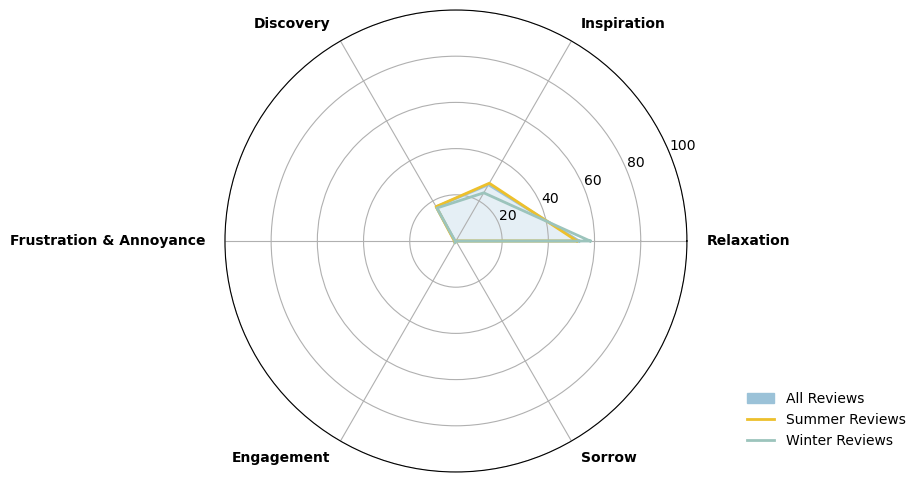

In [124]:
import matplotlib.patches as mpatches

# Function to create radar chart
def add_to_radar(ax, data, angles, label, color, fill=False):
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=label)
    if fill:
        ax.fill(angles, data, color=color, alpha=0.25)

# Set data
labels = np.array(["Relaxation", "Inspiration", "Discovery", "Frustration & Annoyance", "Engagement", "Sorrow"])
num_vars = len(labels)

# Calculate angles for hexagonal setup
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

all_reviews_data = np.concatenate((jfk_emotion_percentages.values.flatten(), [jfk_emotion_percentages.values[0]]))
summer_data = np.concatenate((jfk_summer_percentages.values.flatten(), [jfk_summer_percentages.values[0]]))
winter_data = np.concatenate((jfk_winter_percentages.values.flatten(), [jfk_winter_percentages.values[0]]))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Adding data series 
add_to_radar(ax, all_reviews_data, angles, 'All Reviews', '#9BC2D8', fill=True)
add_to_radar(ax, summer_data, angles, 'Summer Reviews', '#EDC02C')
add_to_radar(ax, winter_data, angles, 'Winter Reviews', '#9CC4BC')


# Set the labels 
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Adjust labels
left_labels = ["Discovery", "Frustration & Annoyance", "Engagement"]
right_labels = ["Inspiration", "Relaxation", "Sorrow"]

for label, angle in zip(ax.get_xticklabels(), np.degrees(angles[:-1])):
    label.set_fontsize(10)
    label.set_weight('bold')
    label.set_color('black')
    if label.get_text() in left_labels:
        label.set_horizontalalignment('right')
    elif label.get_text() in right_labels:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('center')
    label.set_verticalalignment('center')


# limits and labels
ax.set_ylim(0, 100) 

# Create custom legend handles
all_reviews_patch = mpatches.Patch(color='#9BC2D8', label='All Reviews')
summer_line = plt.Line2D([0], [0], color='#EDC02C', label='Summer Reviews', linewidth=2)
winter_line = plt.Line2D([0], [0], color='#9CC4BC', label='Winter Reviews', linewidth=2)
ax.legend(handles=[all_reviews_patch, summer_line, winter_line], loc='upper right', bbox_to_anchor=(1.5, 0.2),frameon=False)


plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/radar_JFK.jpg', format='jpg', dpi=300)

In [ ]:
# Hope Park Rosewind

In [73]:
park_name = "Hope Park"
hope_reviews = reviews_df[reviews_df['ParkName'] == park_name]

In [74]:
hope_reviews.to_csv('output_files/hope_reviews.csv', index=False)

In [121]:
# Calculate the percentage of each emotion
hope_emotion_counts = hope_reviews['new_emotion'].value_counts()
hope_emotion_percentages = (hope_emotion_counts / len(hope_reviews)) * 100

# Select the six emotions you want to include
emotions = ["Relaxation", "Inspiration", "Discovery", "Frustration & Annoyance", "Engagement", "Sorrow"]
hope_emotion_percentages = hope_emotion_percentages.reindex(emotions).fillna(0)

In [122]:
# Convert the 'time' column to datetime
hope_reviews['time'] = pd.to_datetime(hope_reviews['time'])

# Define summer and winter months
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Filter reviews by summer and winter
hope_summer_reviews = hope_reviews[hope_reviews['time'].dt.month.isin(summer_months)]
hope_winter_reviews = hope_reviews[hope_reviews['time'].dt.month.isin(winter_months)]

# Calculate the percentage of each emotion for summer and winter
hope_summer_counts = hope_summer_reviews['new_emotion'].value_counts()
hope_summer_percentages = (hope_summer_counts / len(hope_summer_reviews)) * 100
hope_summer_percentages = hope_summer_percentages.reindex(emotions).fillna(0)

hope_winter_counts = hope_winter_reviews['new_emotion'].value_counts()
hope_winter_percentages = (hope_winter_counts / len(hope_winter_reviews)) * 100
hope_winter_percentages = hope_winter_percentages.reindex(emotions).fillna(0)

C:\Users\gaoxi\AppData\Local\Temp\ipykernel_16992\2410371343.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



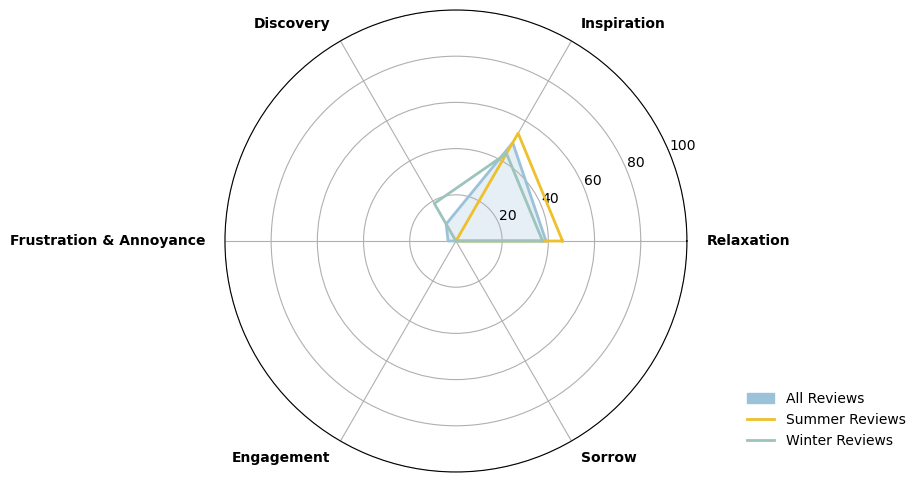

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Function to create radar chart
def add_to_radar(ax, data, angles, label, color, fill=False):
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=label)
    if fill:
        ax.fill(angles, data, color=color, alpha=0.25)

# Set data
labels = np.array(["Relaxation", "Inspiration", "Discovery", "Frustration & Annoyance", "Engagement", "Sorrow"])
num_vars = len(labels)

# Calculate angles for hexagonal setup
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

all_reviews_data = np.concatenate((hope_emotion_percentages.values.flatten(), [hope_emotion_percentages.values[0]]))
summer_data = np.concatenate((hope_summer_percentages.values.flatten(), [hope_summer_percentages.values[0]]))
winter_data = np.concatenate((hope_winter_percentages.values.flatten(), [hope_winter_percentages.values[0]]))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Adding data series 
add_to_radar(ax, all_reviews_data, angles, 'All Reviews', '#9BC2D8', fill=True)
add_to_radar(ax, summer_data, angles, 'Summer Reviews', '#EDC02C')
add_to_radar(ax, winter_data, angles, 'Winter Reviews', '#9CC4BC')


# Set the labels
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Adjust labels 
left_labels = ["Discovery", "Frustration & Annoyance", "Engagement"]
right_labels = ["Inspiration", "Relaxation", "Sorrow"]

for label, angle in zip(ax.get_xticklabels(), np.degrees(angles[:-1])):
    label.set_fontsize(10)
    label.set_weight('bold')
    label.set_color('black')
    if label.get_text() in left_labels:
        label.set_horizontalalignment('right')
    elif label.get_text() in right_labels:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('center')
    label.set_verticalalignment('center')


# Set limits and labels 
ax.set_ylim(0, 100) 

# Create custom legend handles
all_reviews_patch = mpatches.Patch(color='#9BC2D8', label='All Reviews')
summer_line = plt.Line2D([0], [0], color='#EDC02C', label='Summer Reviews', linewidth=2)
winter_line = plt.Line2D([0], [0], color='#9CC4BC', label='Winter Reviews', linewidth=2)
ax.legend(handles=[all_reviews_patch, summer_line, winter_line], loc='upper right', bbox_to_anchor=(1.5, 0.2),frameon=False)


plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/radar_hope.jpg', format='jpg', dpi=300)

## Reviews by Emotion Category over Time

In [72]:
# Ensure 'timestamp' is in datetime format
reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])

# Now extract year and month
reviews_df['year'] = reviews_df['timestamp'].dt.year
reviews_df['month'] = reviews_df['timestamp'].dt.month


# Define the color mapping based on new emotions
color_palette = {
    'Inspiration': '#E2A55E',
    'Relaxation': '#E5C5BD',
    'Frustration & Annoyance': '#96AA9A',
    'Engagement': '#B4BFC5',
    'Discovery': '#CF7041',
    'Sorrow': '#5E718B'
}

# Group by year and emotion
yearly_counts = reviews_df.groupby(['year', 'new_emotion']).size().unstack(fill_value=0)


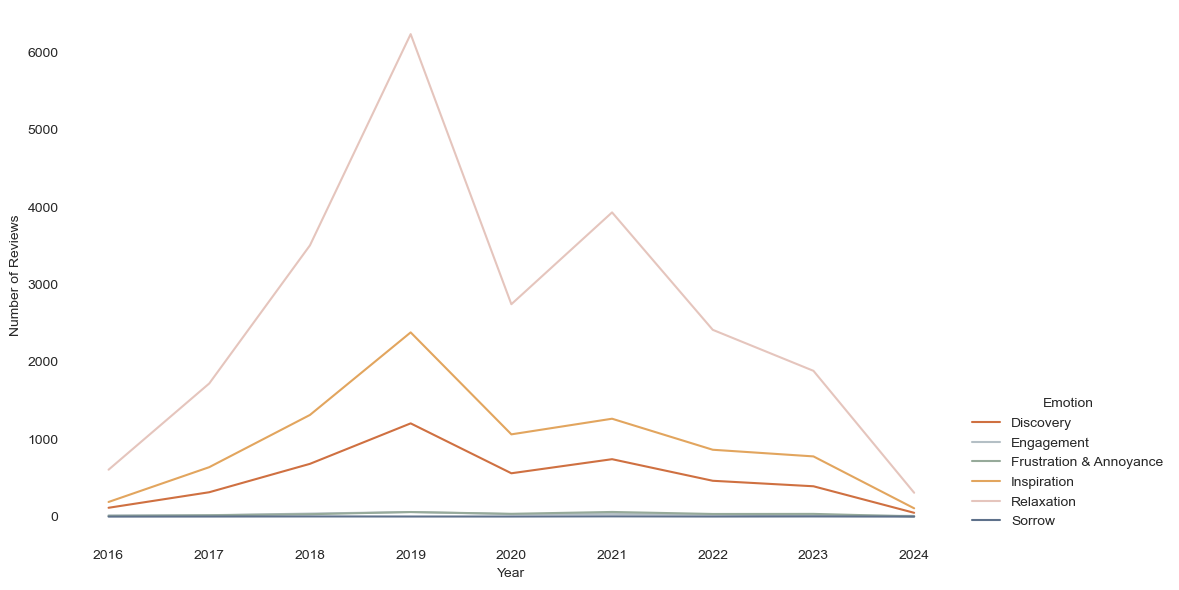

In [287]:
# Function to plot the data
fig, ax = plt.subplots(figsize=(12, 6))
for emotion in yearly_counts.columns:
    ax.plot(yearly_counts.index, yearly_counts[emotion], label=emotion, color=color_palette[emotion])

# Customizing the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
#ax.set_title('Yearly Review Counts by Emotion')
ax.legend(title='Emotion', loc='lower right', bbox_to_anchor=(1.25,0), frameon=False)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)
plt.tight_layout() 

fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/emotion over year.jpg', format='jpg', dpi=300)

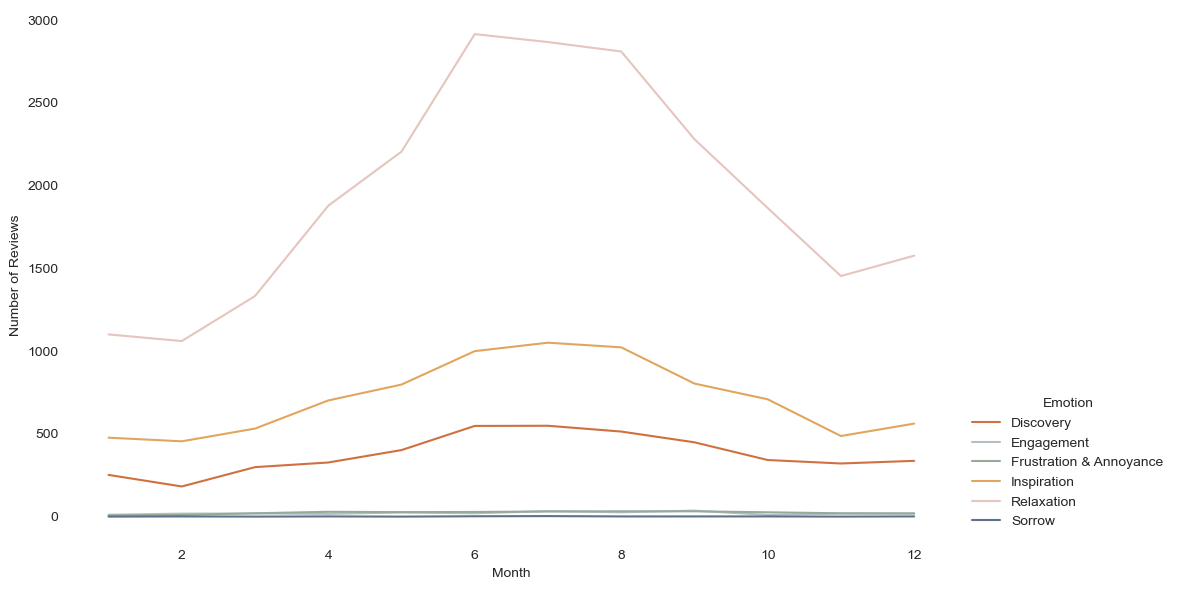

In [292]:
import calendar

fig, ax = plt.subplots(figsize=(12, 6))
for emotion in monthly_counts.columns:
    ax.plot(monthly_counts.index, monthly_counts[emotion], label=emotion, color=color_palette[emotion])

# Customizing the plot
ax.set_xlabel('Month')
ax.set_ylabel('Number of Reviews')
#ax.set_title('Yearly Review Counts by Emotion')
ax.legend(title='Emotion', loc='lower right', bbox_to_anchor=(1.25,0), frameon=False)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)
plt.tight_layout() 
plt.xticks(rotation=0) 

fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/emotion over month.jpg', format='jpg', dpi=300)

## Emtion by Park Function

In [73]:
print(reviews_df['ParkName'].unique())

['Delancey Park' 'Mifflin Square' 'William Lanier Park'
 'Marian Winfield Hissey Recreation Center' 'Palmer Park' 'Disston Park'
 'Sedgley Woods Disc Golf Course' 'Schuylkill Banks'
 'Fish Hatchery at Pleasant Hill Park' 'Pleasant Hill Park'
 'Sherwood Park' 'Hunting Park' 'Schuylkill River Park' 'Carroll Park'
 'Jose Manuel Collazo Park' 'Norman (Butch) Ellis Playground' 'Hope Park'
 'Vernon Park' 'Tacony Creek Park' 'Belmont Plateau'
 'Joseph C Fluehr Memorial Park' 'East Fairmount Park' 'Manayunk Canal'
 'Konrad Square' 'Burholme Park' 'McMichael Park' 'Pretzel Park'
 'Norris Square' 'Logan Square' 'William Lanier Playground'
 'Matthias Baldwin Park' 'Clarence H Clark Park' 'Cliveden Park'
 'Juniata Park' 'Lardners Point Park' 'Rail Park' 'Grays Ferry Crescent'
 'Russell DeRitis Playground' 'Verree and Susquehanna Playground'
 'Korean War Veterans Memorial' 'Frankford and Solly Playground'
 'Blue Bell Park' 'Pennypack on the Delaware' 'Glendinning Rock Garden'
 'Fernhill Park' 'Eman

In [82]:
def define_function(park_name):
    if isinstance(park_name, str):
        lower_park_name = park_name.lower()
        if 'playground' in lower_park_name:
            return 'Playground'
        elif 'court' in lower_park_name or 'tennis' in lower_park_name:
            return 'Sport Court'
        elif 'banks' in lower_park_name or 'river' in lower_park_name or 'creek' in lower_park_name:
            return 'Watershed Park'
        elif 'memorial' in lower_park_name:
            return 'Memorial Park'
        elif 'square' in lower_park_name:
            return 'Sqaure'
        elif 'valley' in lower_park_name:
            return 'Natural Reservation'
        else:
            return 'Regular'

# Assuming 'reviews_df' is your dataframe and 'ParkName' is the column with park names
reviews_df['Function'] = reviews_df['ParkName'].apply(define_function)

In [83]:
# Group data by 'Function' and 'new_emotion', and count occurrences
function_emotion_counts = reviews_df.groupby(['Function', 'new_emotion']).size().unstack(fill_value=0)

# Normalize the data by function totals to compare proportions
function_emotion_proportions = function_emotion_counts.div(function_emotion_counts.sum(axis=1), axis=0) * 100

In [84]:
function_emotion_proportions.reset_index(inplace=True)
melted_data = function_emotion_proportions.melt(id_vars='Function', var_name='Emotion', value_name='Percentage')

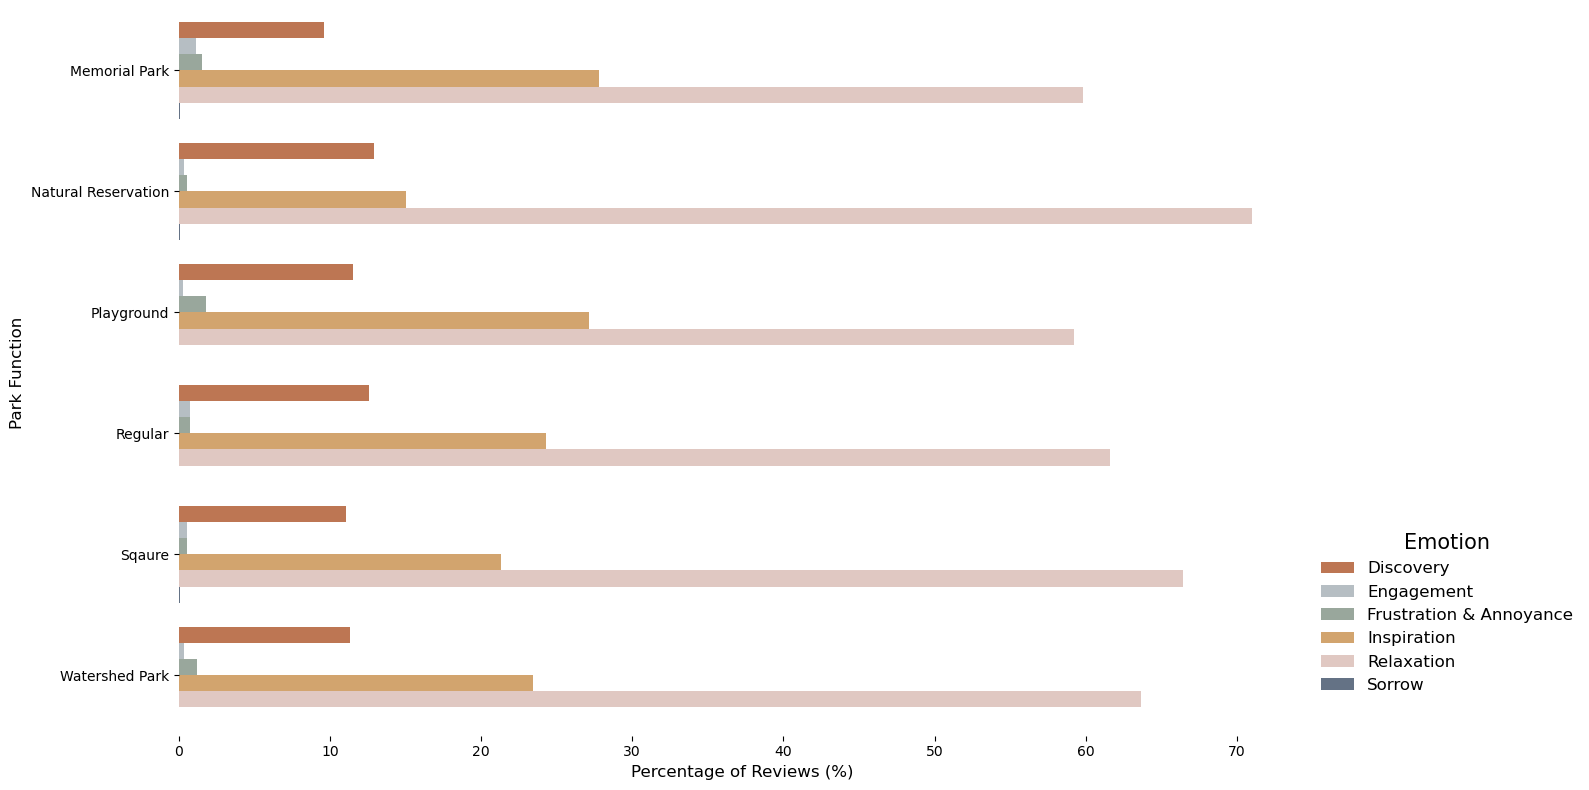

In [89]:
# Create a grouped bar chart
fig=plt.figure(figsize=(16, 8))
barplot = sns.barplot(y='Function', x='Percentage', hue='Emotion', data=melted_data, palette=color_palette)
#plt.title('Emotion Distribution by Park Function')
plt.ylabel('Park Function',fontsize=12)
plt.xlabel('Percentage of Reviews (%)',fontsize=12)
plt.legend(title='Emotion',title_fontsize=15, bbox_to_anchor=(1, 0.3), frameon=False,fontsize=12)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)
plt.tight_layout()  
plt.show()

fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/charts/emo_by_function.jpg', format='jpg', dpi=300)

## Parks with Emotion Lables

### *Emotion Maps*

In [10]:
park_cluster_counts = reviews_df.groupby(['ParkName', 'new_emotion']).size().unstack(fill_value=0)

# Calculate the percentages
park_cluster_percentages = park_cluster_counts.div(park_cluster_counts.sum(axis=1), axis=0) * 100

# Rename the columns to include '_percentage'
park_cluster_percentages.columns = [f'{emotion}_percentage' for emotion in park_cluster_percentages.columns]

# Round the percentages and check the first few rows
park_emo = park_cluster_percentages.round(2)
park_emo.head()


Discovery_percentage  \
ParkName                                                    
29th and Chalmers Playground                         7.96   
Bartrams Mile Trail Greenway (56th)                  7.14   
Belmont Grove                                        9.38   
Belmont Plateau                                      8.69   
Belmont and Edgley Fields                            6.45   

                                     Engagement_percentage  \
ParkName                                                     
29th and Chalmers Playground                          0.00   
Bartrams Mile Trail Greenway (56th)                   0.00   
Belmont Grove                                         3.12   
Belmont Plateau                                       0.23   
Belmont and Edgley Fields                             6.45   

                                     Frustration & Annoyance_percentage  \
ParkName                                                                  
29th and Chalmers Playground                                       1.77   
Bartrams Mile Trail Greenway (56th)                                0.00   
Belmont Grove                                                      0.00   
Belmont Plateau                                                    0.70   
Belmont and Edgley Fields                                          3.23   

                                     Inspiration_percentage  \
ParkName                                                      
29th and Chalmers Playground                          36.28   
Bartrams Mile Trail Greenway (56th)                   17.86   
Belmont Grove                                         18.75   
Belmont Plateau                                       20.05   
Belmont and Edgley Fields                             35.48   

                                     Relaxation_percentage  Sorrow_percentage  
ParkName                                                                       
29th and Chalmers Playground                         53.98                0.0  
Bartrams Mile Trail Greenway (56th)                  75.00                0.0  
Belmont Grove                                        68.75                0.0  
Belmont Plateau                                      70.34                0.0  
Belmont and Edgley Fields                            48.39                0.0

In [11]:
park_plot = park_plot.merge(park_emo, on='ParkName', how='left')

park_plot.head()

park_plot = gpd.GeoDataFrame(
    park_plot, 
    geometry=gpd.points_from_xy(park_plot['Long'], park_plot['Lat'])
)

# Set the original CRS for the GeoDataFrame
park_plot.set_crs('EPSG:4326', inplace=True)


NameError: name 'park_plot' is not defined

In [ ]:
print(park_emo.columns)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.colors as mcolors

In [12]:
weighted_counts = reviews_df.groupby(['ParkName', 'new_emotion']).apply(
    lambda x: (x['weights']).sum()
).unstack(fill_value=0)

# Calculate the total weights per park to normalize
total_weights_per_park_weighted = weighted_counts.sum(axis=1)

# Calculate weighted percentages
park_cluster_percentages_weighted = weighted_counts.div(total_weights_per_park_weighted, axis=0) * 100

# Rename the columns to include '_percentage'
park_cluster_percentages_weighted.columns = [f'{emotion}_percentage_weighted' for emotion in park_cluster_percentages_weighted.columns]

# Round the percentages and check the first few rows
park_emo_weighted = park_cluster_percentages_weighted.round(2)

C:\Users\gaoxi\AppData\Local\Temp\ipykernel_30472\2597093722.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_counts = reviews_df.groupby(['ParkName', 'new_emotion']).apply(


In [315]:
park_emo_weighted.head()

Discovery_percentage_weighted  \
ParkName                                                             
29th and Chalmers Playground                                 13.40   
Bartrams Mile Trail Greenway (56th)                           2.24   
Belmont Grove                                                21.13   
Belmont Plateau                                               8.07   
Belmont and Edgley Fields                                     2.19   

                                     Engagement_percentage_weighted  \
ParkName                                                              
29th and Chalmers Playground                                   0.00   
Bartrams Mile Trail Greenway (56th)                            0.00   
Belmont Grove                                                  0.45   
Belmont Plateau                                                0.41   
Belmont and Edgley Fields                                      3.42   

                                     Frustration & Annoyance_percentage_weighted  \
ParkName                                                                           
29th and Chalmers Playground                                                1.22   
Bartrams Mile Trail Greenway (56th)                                         0.00   
Belmont Grove                                                               0.00   
Belmont Plateau                                                             0.88   
Belmont and Edgley Fields                                                  13.25   

                                     Inspiration_percentage_weighted  \
ParkName                                                               
29th and Chalmers Playground                                   44.62   
Bartrams Mile Trail Greenway (56th)                            31.75   
Belmont Grove                                                  17.89   
Belmont Plateau                                                18.64   
Belmont and Edgley Fields                                      33.29   

                                     Relaxation_percentage_weighted  \
ParkName                                                              
29th and Chalmers Playground                                  40.76   
Bartrams Mile Trail Greenway (56th)                           66.01   
Belmont Grove                                                 60.53   
Belmont Plateau                                               72.00   
Belmont and Edgley Fields                                     47.86   

                                     Sorrow_percentage_weighted  
ParkName                                                         
29th and Chalmers Playground                                0.0  
Bartrams Mile Trail Greenway (56th)                         0.0  
Belmont Grove                                               0.0  
Belmont Plateau                                             0.0  
Belmont and Edgley Fields                                   0.0

In [316]:
park_plot = park_plot.merge(park_emo_weighted, on='ParkName', how='left')

park_plot.head()

park_plot = gpd.GeoDataFrame(
    park_plot, 
    geometry=gpd.points_from_xy(park_plot['Long'], park_plot['Lat'])
)

# Set the original CRS for the GeoDataFrame
park_plot.set_crs('EPSG:4326', inplace=True)

ParkName       Long        Lat  \
0                              Delancey Park -75.147900  39.944080   
1                             Mifflin Square -75.156519  39.919477   
2                        William Lanier Park -75.193880  39.933620   
3   Marian Winfield Hissey Recreation Center -75.123340  39.994330   
4                                Palmer Park -75.132540  39.974890   
..                                       ...        ...        ...   
88              Frankford and Pennypack Park -75.035803  40.049551   
89                            Pennypack Park -75.035803  40.049551   
90                            Gold Star Park -75.155180  39.932940   
91                     Frank Palumbo Sr Park -75.155587  39.939260   
92                  Giuseppe Bardascino Park -75.159919  39.937796   

    review_count_by_park                    geometry  size_category  \
0                    102  POINT (-75.14790 39.94408)            100   
1                    165  POINT (-75.15652 39.91948)            100   
2                     80  POINT (-75.19388 39.93362)             50   
3                     50  POINT (-75.12334 39.99433)             50   
4                     86  POINT (-75.13254 39.97489)             50   
..                   ...                         ...            ...   
88                    72  POINT (-75.03580 40.04955)             50   
89                    72  POINT (-75.03580 40.04955)             50   
90                    74  POINT (-75.15518 39.93294)             50   
91                    27  POINT (-75.15559 39.93926)             50   
92                    42  POINT (-75.15992 39.93780)             50   

    sentiment  weighted_average_sentiment  Discovery_percentage  \
0    0.819293                    0.824534                  8.82   
1    0.264519                    0.376713                  5.45   
2    0.606904                    0.572073                  8.75   
3    0.294164                    0.132645                  6.00   
4    0.776113                    0.820867                 13.95   
..        ...                         ...                   ...   
88   0.625532                    0.614621                 15.28   
89   0.625532                    0.614621                 15.28   
90   0.568820                    0.529703                 17.57   
91   0.928232                    0.940616                  7.41   
92   0.571604                    0.760506                  9.52   

    Engagement_percentage  Frustration & Annoyance_percentage  \
0                    0.98                                0.00   
1                    1.21                                1.21   
2                    0.00                                0.00   
3                    2.00                                0.00   
4                    0.00                                2.33   
..                    ...                                 ...   
88                   0.00                                0.00   
89                   0.00                                0.00   
90                   1.35                                0.00   
91                   0.00                                0.00   
92                   0.00                                0.00   

    Inspiration_percentage  Relaxation_percentage  Sorrow_percentage  \
0                    17.65                  72.55               0.00   
1                    44.85                  46.67               0.61   
2                    26.25                  65.00               0.00   
3                    36.00                  56.00               0.00   
4                    23.26                  60.47               0.00   
..                     ...                    ...                ...   
88                   26.39                  58.33               0.00   
89                   26.39                  58.33               0.00   
90                   27.03                  54.05               0.00   
91                    7.41          

In [317]:
emotion_columns = ['Discovery_percentage_weighted', 'Engagement_percentage_weighted', 'Frustration & Annoyance_percentage_weighted', 
                   'Inspiration_percentage_weighted', 'Relaxation_percentage_weighted', 'Sorrow_percentage_weighted']

park_plot['Dominant_Emotion_weighted'] = park_plot[emotion_columns].idxmax(axis=1).str.replace('_percentage_weighted', '')

park_plot.head()

ParkName       Long        Lat  \
0                             Delancey Park -75.147900  39.944080   
1                            Mifflin Square -75.156519  39.919477   
2                       William Lanier Park -75.193880  39.933620   
3  Marian Winfield Hissey Recreation Center -75.123340  39.994330   
4                               Palmer Park -75.132540  39.974890   

   review_count_by_park                    geometry  size_category  sentiment  \
0                   102  POINT (-75.14790 39.94408)            100   0.819293   
1                   165  POINT (-75.15652 39.91948)            100   0.264519   
2                    80  POINT (-75.19388 39.93362)             50   0.606904   
3                    50  POINT (-75.12334 39.99433)             50   0.294164   
4                    86  POINT (-75.13254 39.97489)             50   0.776113   

   weighted_average_sentiment  Discovery_percentage  Engagement_percentage  \
0                    0.824534                  8.82                   0.98   
1                    0.376713                  5.45                   1.21   
2                    0.572073                  8.75                   0.00   
3                    0.132645                  6.00                   2.00   
4                    0.820867                 13.95                   0.00   

   ...  Inspiration_percentage  Relaxation_percentage  Sorrow_percentage  \
0  ...                   17.65                  72.55               0.00   
1  ...                   44.85                  46.67               0.61   
2  ...                   26.25                  65.00               0.00   
3  ...                   36.00                  56.00               0.00   
4  ...                   23.26                  60.47               0.00   

   Discovery_percentage_weighted  Engagement_percentage_weighted  \
0                           7.98                            0.40   
1                           4.40                            0.69   
2                           9.31                            0.00   
3                           6.07                            0.29   
4                          12.29                            0.00   

   Frustration & Annoyance_percentage_weighted  \
0                                         0.00   
1                                         0.96   
2                                         0.00   
3                                         0.00   
4                                         7.12   

   Inspiration_percentage_weighted  Relaxation_percentage_weighted  \
0                            17.45                           74.17   
1                            45.09                           48.77   
2                            24.54                           66.15   
3                            32.59                           61.05   
4                            14.88                           65.71   

   Sorrow_percentage_weighted  Dominant_Emotion_weighted  
0                        0.00                 Relaxation  
1                        0.08                 Relaxation  
2                        0.00                 Relaxation  
3                        0.00                 Relaxation  
4                        0.00                 Relaxation  

[5 rows x 21 columns]

In [447]:
def map_size_category(x):
    # Define custom breaks and corresponding sizes
    breaks = [0, 100, 250, 500, 1000,  max(park_plot['review_count_by_park'])]
    sizes = [50, 100, 150, 200, 250]

    for i, break_point in enumerate(breaks[:-1]):
        if x <= breaks[i+1]:
            return sizes[i]
    return sizes[-1]

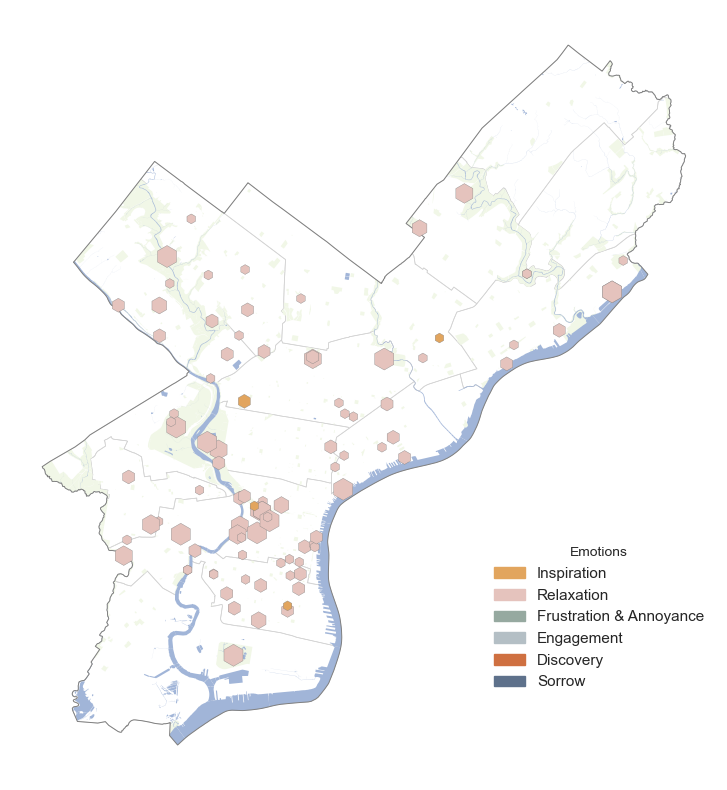

In [453]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.5)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#A1B5D8', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

color_palette = {
    'Inspiration': '#E2A55E',
    'Relaxation': '#E5C3BD',
    'Frustration & Annoyance': '#96A9A0',
    'Engagement': '#B4BFC5',
    'Discovery': '#CF7041',
    'Sorrow': '#5E718B'
}


colors = [color_palette[emotion] for emotion in park_plot['Dominant_Emotion_weighted']]

# Plot each emotion as a separate scatter plot
scatter = ax.scatter(
    park_plot['Long'], park_plot['Lat'], 
    c=colors,  
    s=park_plot['review_count_by_park'].apply(map_size_category),
    edgecolor='grey', linewidth=0.25, marker='h',label=label
)

# Customize the plot
#plt.title('Weighted Dominant Emotion Mapping', fontsize=20)
#plt.figtext(0.5, 0.85, 'Point size represents number of reviews', wrap=True, horizontalalignment='center', fontsize=15)
#plt.figtext(0.5, 0.85, 'Mapping of Emotions Across the City', wrap=True, horizontalalignment='center', fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
sns.despine(left=True, bottom=True, right=True, top=True)

# Add a legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.RegularPolygon((0.5, 0.5), numVertices=6, radius=0.1, orientation=np.pi/6, color=color, label=label) for label, color in color_palette.items()]
ax.legend(handles=legend_handles, title='Emotions', fontsize=11, loc='lower right', bbox_to_anchor=(1, 0.1), frameon=False)

plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/domi.jpg', format='jpg', dpi=300)

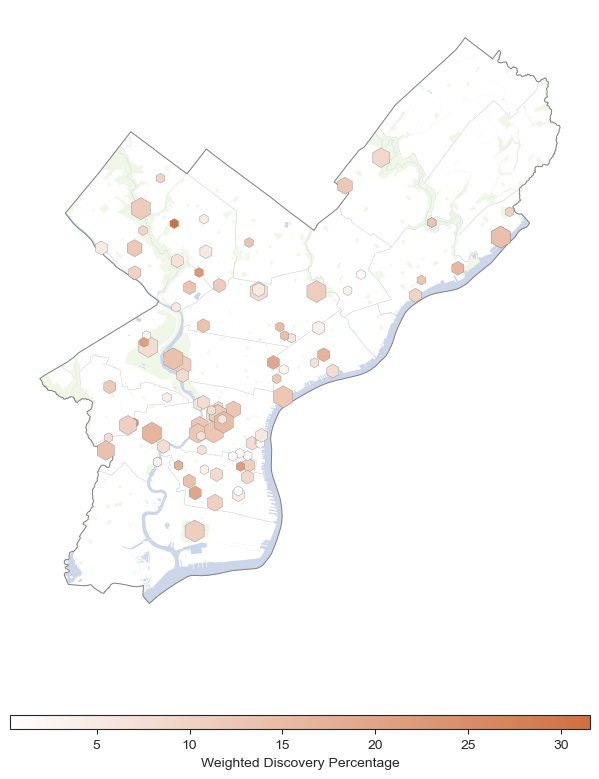

In [326]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Discovery_percentage_weighted'].min(), vmax=park_plot['Discovery_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Discovery_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#CF7041']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#CF7041']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Discovery Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/disc_w.jpg', format='jpg', dpi=300)

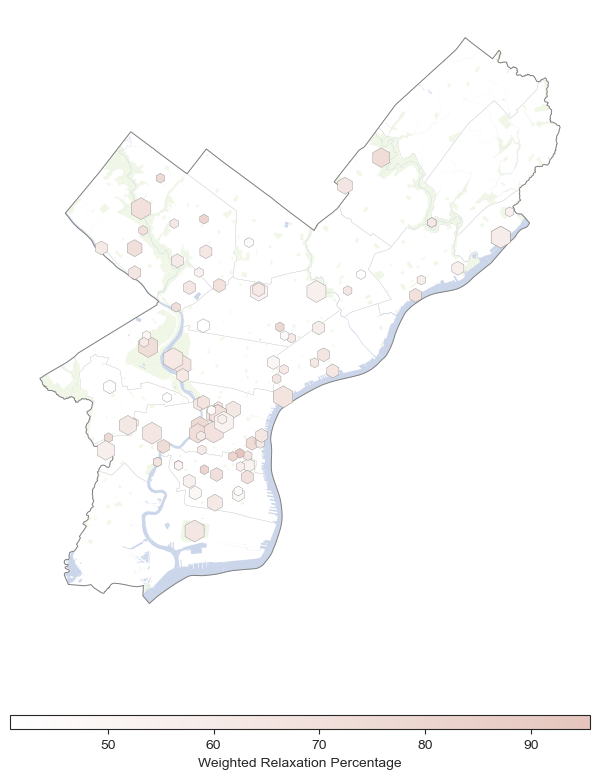

In [327]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Relaxation_percentage_weighted'].min(), vmax=park_plot['Relaxation_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Relaxation_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#E5C5BD']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#E5C5BD']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Relaxation Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/rex_w.jpg', format='jpg', dpi=300)

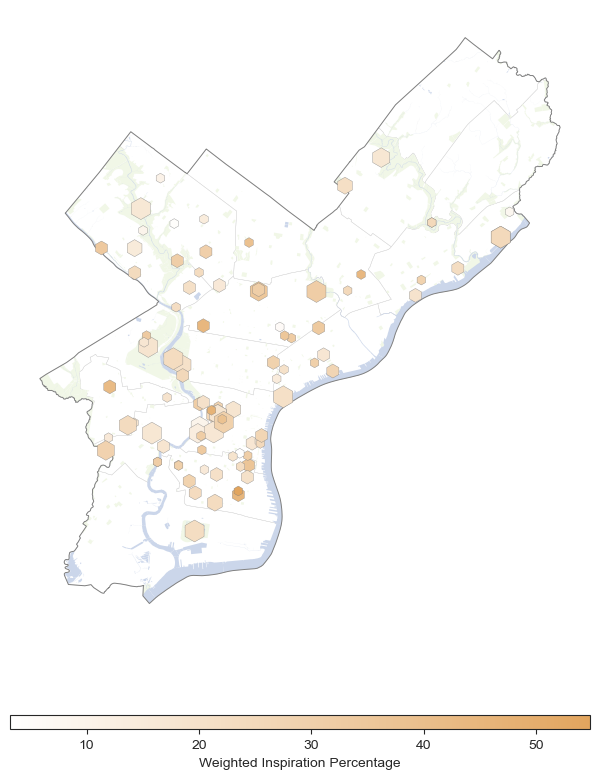

In [329]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Inspiration_percentage_weighted'].min(), vmax=park_plot['Inspiration_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Inspiration_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#E2A55E']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#E2A55E']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Inspiration Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/insp_w.jpg', format='jpg', dpi=300)

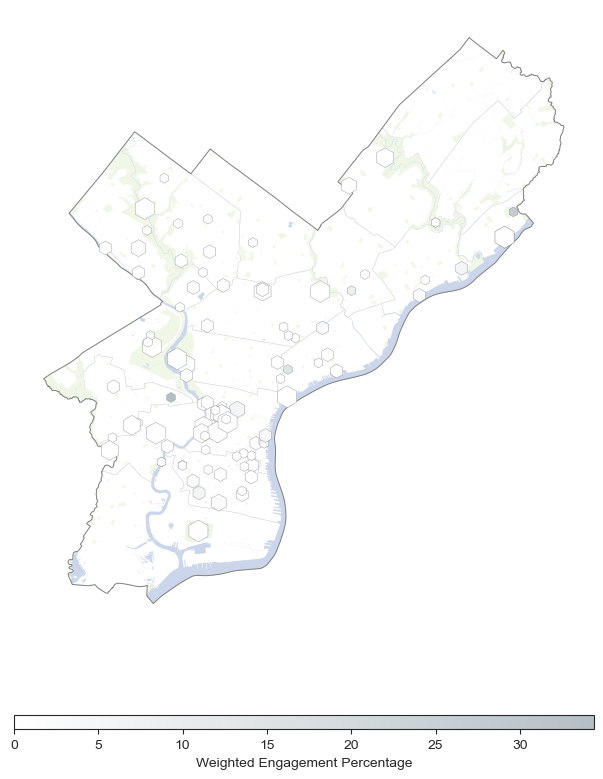

In [330]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Engagement_percentage_weighted'].min(), vmax=park_plot['Engagement_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Engagement_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#B4BFC5']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#B4BFC5']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Engagement Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/eng_w.jpg', format='jpg', dpi=300)

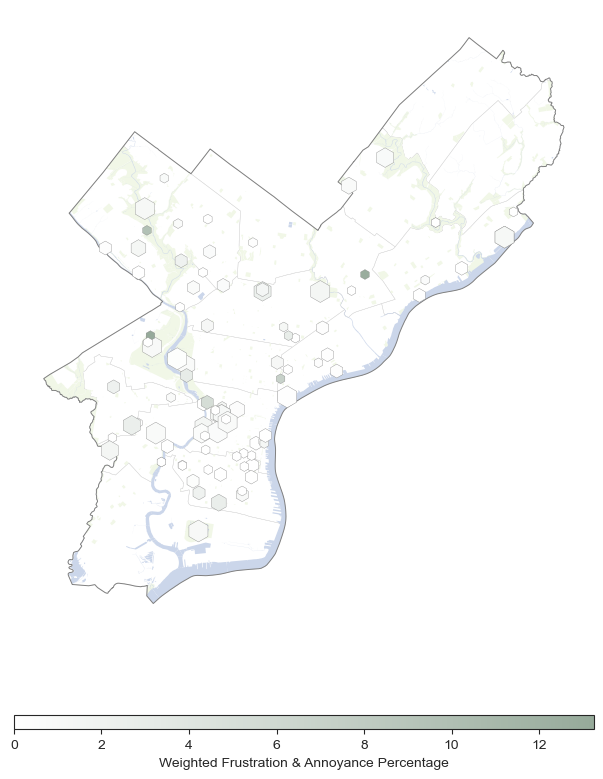

In [331]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Frustration & Annoyance_percentage_weighted'].min(), vmax=park_plot['Frustration & Annoyance_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Frustration & Annoyance_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#96AA9A']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#96AA9A']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Frustration & Annoyance Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/fa_w.jpg', format='jpg', dpi=300)

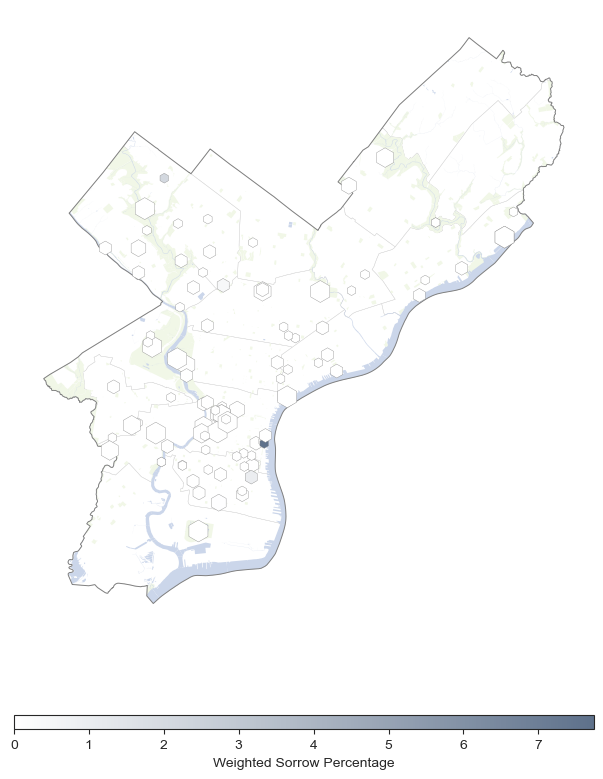

In [332]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Sorrow_percentage_weighted'].min(), vmax=park_plot['Sorrow_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Sorrow_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#5E718B']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#5E718B']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Sorrow Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/sorrow_w.jpg', format='jpg', dpi=300)

### *emotion in the recent one year*

In [333]:
reviews_df.head()

timestamp              author                user_id  \
0 2023-12-30 19:08:54     Eleni Belisonzi  106030427780813104531   
1 2023-08-14 17:51:59      Marta Harrison  116743363301808220011   
2 2023-06-06 11:43:07  Akshita Srivastava  111921958911249462562   
3 2023-04-20 20:58:42        Andy Reinoso  116446471570828426598   
4 2023-03-20 22:03:31       Moaaz Marzouk  110355050307790944461   

                                         review_text  rating  \
0                                  A neighbor jewel.       5   
1  visited in a nostalgia trip, as I took my todd...       4   
2       Hung out in peace, great for solitude lovers       5   
3  Nice little park in the middle of old historic...       4   
4                          Nice small place for kids       4   

                      place_id       ParkName       Lat     Long  \
0  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
1  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
2  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
3  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   
4  ChIJ-5kFm5vIxokR8VHXewCN8eY  Delancey Park  39.94408 -75.1479   

                 time  ...    relief   remorse   sadness  surprise   weights  \
0 2023-12-30 19:08:54  ...  0.000340  0.000415  0.002123  0.001158  0.713175   
1 2023-08-14 17:51:59  ...  0.027964  0.000763  0.004404  0.002918  0.548760   
2 2023-06-06 11:43:07  ...  0.008279  0.000474  0.004261  0.000506  0.481366   
3 2023-04-20 20:58:42  ...  0.005709  0.000175  0.001040  0.000501  0.440263   
4 2023-03-20 22:03:31  ...  0.000588  0.000234  0.000922  0.000758  0.415093   

   cluster  new_emotion  year  month  Function  
0        7  Inspiration  2023     12   Regular  
1        3   Relaxation  2023      8   Regular  
2        0   Relaxation  2023      6   Regular  
3        0   Relaxation  2023      4   Regular  
4        0   Relaxation  2023      3   Regular  

[5 rows x 48 columns]

In [13]:
reviews_df['time'] = reviews_df['time'].astype(str)

# Filter the DataFrame to include only rows where 'time' starts with 2023 or 2024
reviews_df_2324 = reviews_df[reviews_df['time'].str.startswith(('2023', '2024'))]

In [14]:
park_plot_new = reviews_df_2324.drop_duplicates(subset='ParkName')[['ParkName', 'Long', 'Lat']]

review_count_by_park_new = reviews_df_2324.groupby('ParkName').size().reset_index(name='ReviewCount')

# Merge the review count with the park_plot_new DataFrame
park_plot_new = park_plot_new.merge(review_count_by_park_new, on='ParkName', how='left')

park_plot_new.head()

ParkName       Long        Lat  ReviewCount
0                             Delancey Park -75.147900  39.944080            7
1                            Mifflin Square -75.156519  39.919477           13
2                       William Lanier Park -75.193880  39.933620           11
3  Marian Winfield Hissey Recreation Center -75.123340  39.994330            4
4                               Palmer Park -75.132540  39.974890           15

In [15]:
weighted_counts = reviews_df_2324.groupby(['ParkName', 'new_emotion']).apply(
    lambda x: (x['weights']).sum()
).unstack(fill_value=0)

# Calculate the total weights per park to normalize
total_weights_per_park_weighted = weighted_counts.sum(axis=1)

# Calculate weighted percentages
park_cluster_percentages_weighted = weighted_counts.div(total_weights_per_park_weighted, axis=0) * 100

# Rename the columns to include '_percentage'
park_cluster_percentages_weighted.columns = [f'{emotion}_percentage_weighted' for emotion in park_cluster_percentages_weighted.columns]

# Round the percentages and check the first few rows
park_emo_weighted = park_cluster_percentages_weighted.round(2)

C:\Users\gaoxi\AppData\Local\Temp\ipykernel_30472\3255072439.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_counts = reviews_df_2324.groupby(['ParkName', 'new_emotion']).apply(


In [24]:
park_plot_new = park_plot_new.merge(park_emo_weighted, on='ParkName', how='left')

park_plot_new.head()

park_plot_new = gpd.GeoDataFrame(
    park_plot_new, 
    geometry=gpd.points_from_xy(park_plot_new['Long'], park_plot_new['Lat'])
)

# Set the original CRS for the GeoDataFrame
park_plot_new.set_crs('EPSG:4326', inplace=True)

ParkName       Long        Lat  \
0                              Delancey Park -75.147900  39.944080   
1                             Mifflin Square -75.156519  39.919477   
2                        William Lanier Park -75.193880  39.933620   
3   Marian Winfield Hissey Recreation Center -75.123340  39.994330   
4                                Palmer Park -75.132540  39.974890   
..                                       ...        ...        ...   
87              Frankford and Pennypack Park -75.035803  40.049551   
88                            Pennypack Park -75.035803  40.049551   
89                            Gold Star Park -75.155180  39.932940   
90                     Frank Palumbo Sr Park -75.155587  39.939260   
91                  Giuseppe Bardascino Park -75.159919  39.937796   

    ReviewCount  Discovery_percentage_weighted_x  \
0             7                            10.81   
1            13                             0.00   
2            11                             8.38   
3             4                             0.00   
4            15                            12.61   
..          ...                              ...   
87           25                            10.38   
88           25                            10.38   
89            7                            31.48   
90            3                             0.00   
91            3                             0.00   

    Engagement_percentage_weighted_x  \
0                                0.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   
..                               ...   
87                               0.0   
88                               0.0   
89                               0.0   
90                               0.0   
91                               0.0   

    Frustration & Annoyance_percentage_weighted_x  \
0                                            0.00   
1                                            0.00   
2                                            0.00   
3                                            0.00   
4                                            7.13   
..                                            ...   
87                                           0.00   
88                                           0.00   
89                                           0.00   
90                                           0.00   
91                                           0.00   

    Inspiration_percentage_weighted_x  Relaxation_percentage_weighted_x  \
0                               21.49                             67.70   
1                               52.95                             47.05   
2                                8.64                             82.97   
3                               43.17                             56.83   
4                               11.41                             68.85   
..                                ...                               ...   
87                              19.56                             70.06   
88                              19.56                             70.06   
89                               0.00                             68.52   
90                               0.00                            100.00   
91                               0.00                            100.00   

    Sorrow_percentage_weighted_x  Discovery_percentage_weighted_y  \
0                            0.0                            10.81   
1                            0.0                             0.00   
2                            0.0                             8.38   
3                            0.0                             0.00   
4                            0.0                            12.61   
..                           ...                              ...   
87                           0.0                            10.38   

In [36]:
sorted_park_plot_new = park_plot_new.sort_values(by=['Frustration & Annoyance_percentage_weighted_x'], ascending=False)

sorted_park_plot_new.head()

ParkName       Long        Lat  ReviewCount  \
45          Belmont and Edgley Fields -75.213776  39.995501            3   
49  Salvatore Pachella Memorial Field -75.215937  40.045791            6   
73                        Eakins Oval -75.178359  39.963627           13   
4                         Palmer Park -75.132540  39.974890           15   
42            Glendinning Rock Garden -75.191200  39.976450           17   

    Discovery_percentage_weighted_x  Engagement_percentage_weighted_x  \
45                             0.00                               0.0   
49                            17.72                               0.0   
73                            10.18                               0.0   
4                             12.61                               0.0   
42                             6.01                               0.0   

    Frustration & Annoyance_percentage_weighted_x  \
45                                          36.23   
49                                          16.61   
73                                           8.48   
4                                            7.13   
42                                           5.39   

    Inspiration_percentage_weighted_x  Relaxation_percentage_weighted_x  \
45                               0.00                             63.77   
49                               0.00                             65.67   
73                              17.56                             63.78   
4                               11.41                             68.85   
42                              27.21                             61.39   

    Sorrow_percentage_weighted_x  Discovery_percentage_weighted_y  \
45                           0.0                             0.00   
49                           0.0                            17.72   
73                           0.0                            10.18   
4                            0.0                            12.61   
42                           0.0                             6.01   

    Engagement_percentage_weighted_y  \
45                               0.0   
49                               0.0   
73                               0.0   
4                                0.0   
42                               0.0   

    Frustration & Annoyance_percentage_weighted_y  \
45                                          36.23   
49                                          16.61   
73                                           8.48   
4                                            7.13   
42                                           5.39   

    Inspiration_percentage_weighted_y  Relaxation_percentage_weighted_y  \
45                               0.00                             63.77   
49                               0.00                             65.67   
73                              17.56                             63.78   
4                               11.41                             68.85   
42                              27.21                             61.39   

    Sorrow_percentage_weighted_y                    geometry  
45                           0.0  POINT (-75.21378 39.99550)  
49                           0.0  POINT (-75.21594 40.04579)  
73                           0.0  POINT (-75.17836 39.96363)  
4                            0.0  POINT (-75.13254 39.97489)  
42                           0.0  POINT (-75.19120 39.97645)

In [343]:
def map_size_category(x):
    breaks = [0, 100, 250, 500, 1000, 2500, max(park_plot_new['ReviewCount'])]  
    sizes = [50, 100, 150, 200, 250]
    for i, break_point in enumerate(breaks):
        if x <= break_point:
            return sizes[i]
    return sizes[-1]

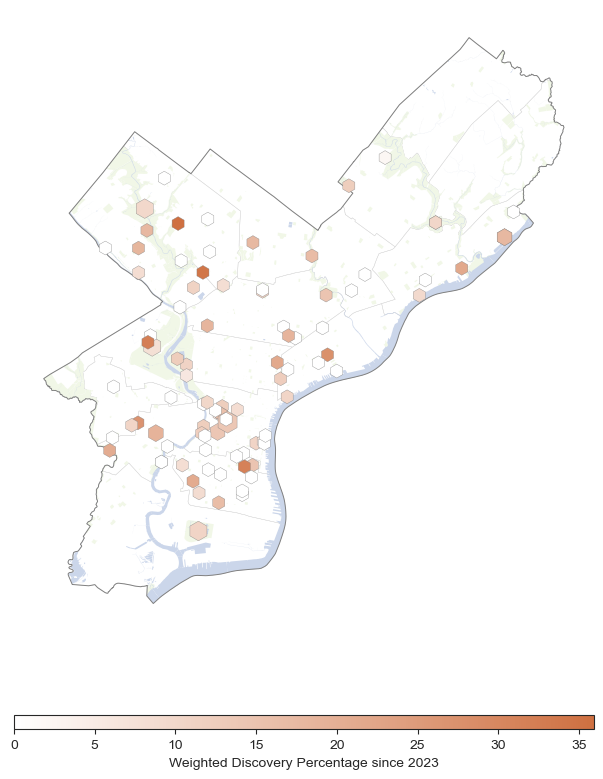

In [349]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Discovery_percentage_weighted'].min(), vmax=park_plot_new['Discovery_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Discovery_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#CF7041']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#CF7041']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Discovery Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/disc_w_2324.jpg', format='jpg', dpi=300)

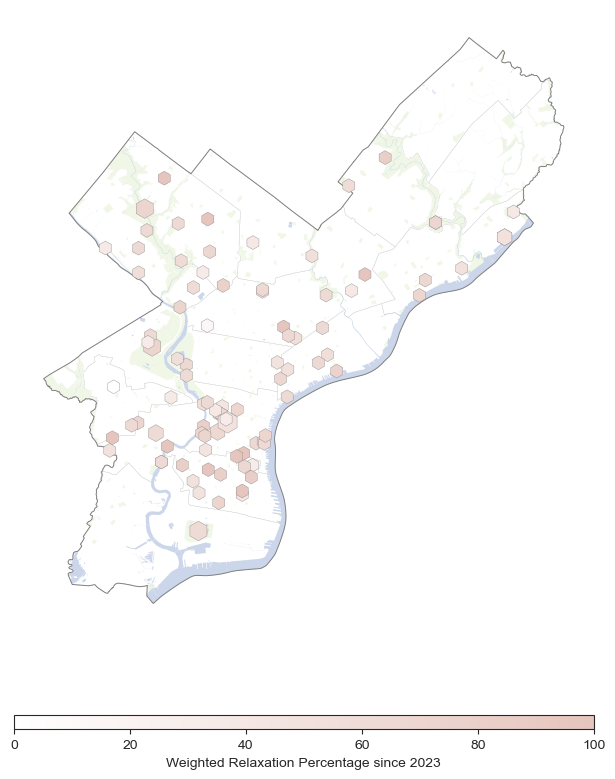

In [348]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Relaxation_percentage_weighted'].min(), vmax=park_plot_new['Relaxation_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Relaxation_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#E5C5BD']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#E5C5BD']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Relaxation Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/rex_w_2324.jpg', format='jpg', dpi=300)

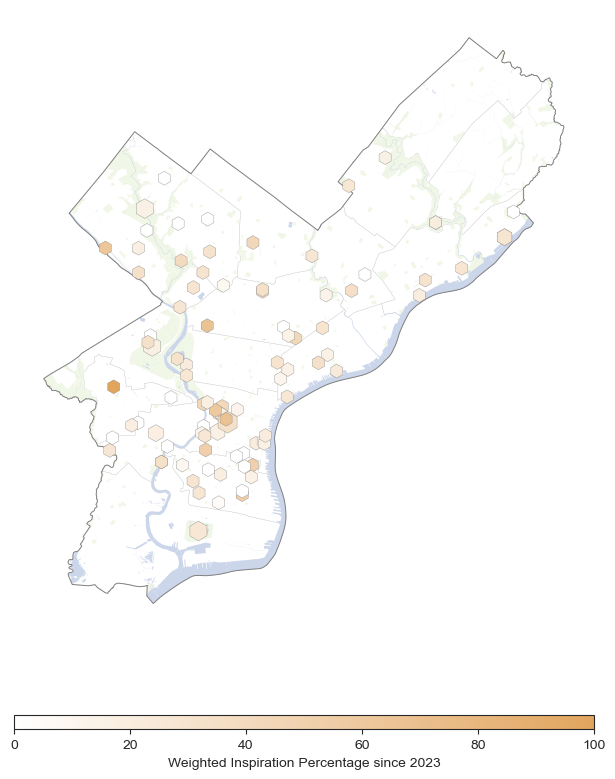

In [347]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Inspiration_percentage_weighted'].min(), vmax=park_plot_new['Inspiration_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Inspiration_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#E2A55E']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#E2A55E']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Inspiration Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/insp_w_2324.jpg', format='jpg', dpi=300)

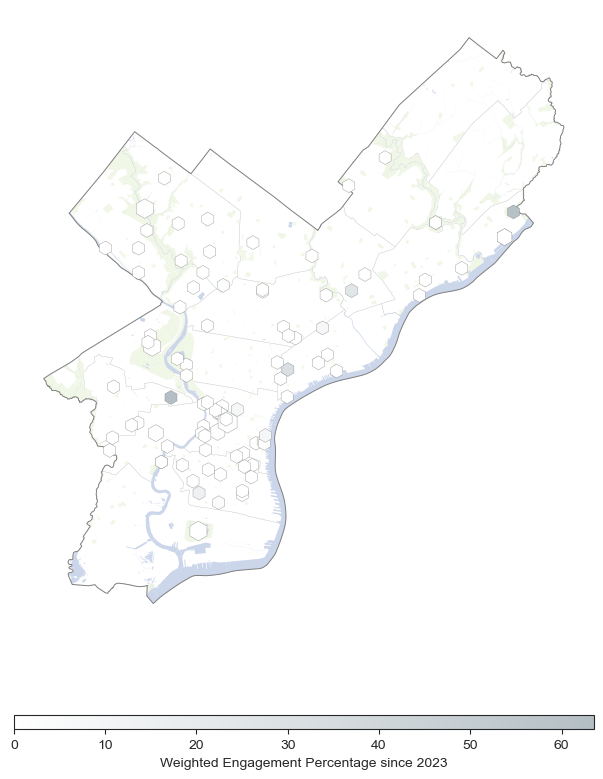

In [346]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Engagement_percentage_weighted'].min(), vmax=park_plot_new['Engagement_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Engagement_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#B4BFC5']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#B4BFC5']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Engagement Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/eng_w_2324.jpg', format='jpg', dpi=300)

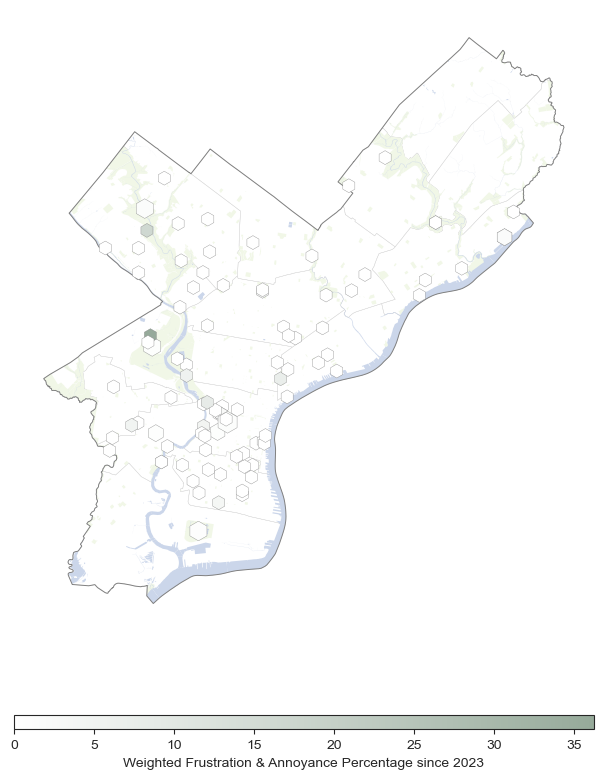

In [345]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Frustration & Annoyance_percentage_weighted'].min(), vmax=park_plot_new['Frustration & Annoyance_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Frustration & Annoyance_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#96AA9A']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#96AA9A']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Frustration & Annoyance Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/fa_w_2324.jpg', format='jpg', dpi=300)

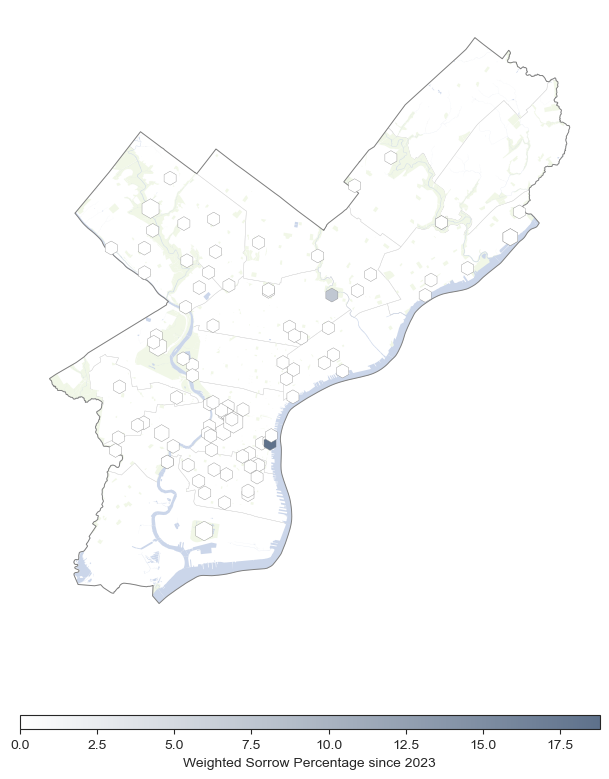

In [344]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Sorrow_percentage_weighted'].min(), vmax=park_plot_new['Sorrow_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Sorrow_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#5E718B']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#5E718B']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Sorrow Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/maps/sorrow_w_2324.jpg', format='jpg', dpi=300)

## Keywords by Emotions

In [13]:
inspiration_df = reviews_df[reviews_df['new_emotion'] == 'Inspiration']
discovery_df = reviews_df[reviews_df['new_emotion'] == 'Discovery']
relexation_df = reviews_df[reviews_df['new_emotion'] == 'Relaxation']
engagement_df = reviews_df[reviews_df['new_emotion'] == 'Engagement']
sorrow_df = reviews_df[reviews_df['new_emotion'] == 'Sorrow']
frustration_df = reviews_df[reviews_df['new_emotion'] == 'Frustration & Annoyance']

In [ ]:
len(frustration_df)

In [402]:
!pip install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 10.2/981.5 kB ? eta -:--:--
     - ----------------------------------- 41.0/981.5 kB 393.8 kB/s eta 0:00:03
     ----- -------------------------------- 143.4/981.5 kB 1.1 MB/s eta 0:00:01
     ---------------- --------------------- 430.1/981.5 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993253 sha256=cee4f78a0662c59903fa284df225e7b2f5f1f26283c6cdf8c2ad9fb9f745df36
  Stored in directory: c:\users\gaoxi\appdata\local\pip\cache\wheels\95\03\7d\59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


### *Word Frequenty (end up with only LDA MAYBE)*

In [18]:
from collections import Counter
import string
import nltk
from langdetect import detect, LangDetectException

nltk.download('stopwords')
from nltk.corpus import stopwords


def normalize_text(word):
    # Manually remove common plural and tense endings
    if word.endswith('s'):
        word = word[:-1]
    if word.endswith('es'):
        word = word[:-2]
    if word.endswith('ed'):
        word = word[:-2]
    if word.endswith('ing'):
        word = word[:-3]
    return word

def content_analysis(df, text_column, emotion_label, words_to_drop):
    # Convert text to lowercase and remove punctuation
    words = df[text_column].str.lower().replace(f'[{string.punctuation}]', '', regex=True).str.split()

    # Flatten list of words and normalize
    words_flat = [normalize_text(word) for sublist in words for word in sublist if word.strip()]

    # Remove stopwords and unwanted words
    stop_words = set(stopwords.words('english'))
    words_no_stop = [word for word in words_flat if word not in stop_words and word not in words_to_drop]

    # Count the frequency of each word
    word_counts = Counter(words_no_stop)

    # Convert to a DataFrame
    words_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

    words_df.head(10).set_index('word').plot(
        kind='barh',
        color='#9BC2D8',
        figsize=(10, 8),
        fontsize = 14,
        legend=False
    )
    #plt.title(f'Word Frequency for {emotion_label.capitalize()} Reviews')
    plt.ylabel('')  # Hide the y-Label
    sns.despine(left=True, bottom=True, right=True, top=True) 
    plt.gca().invert_yaxis()
    plt.savefig(f'D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/Word_Frequency_for_{emotion_label.capitalize()}_Reviews.jpg', format='jpg', dpi=300)

    plt.show()  # Show the plot after saving it

    return words_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaoxi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


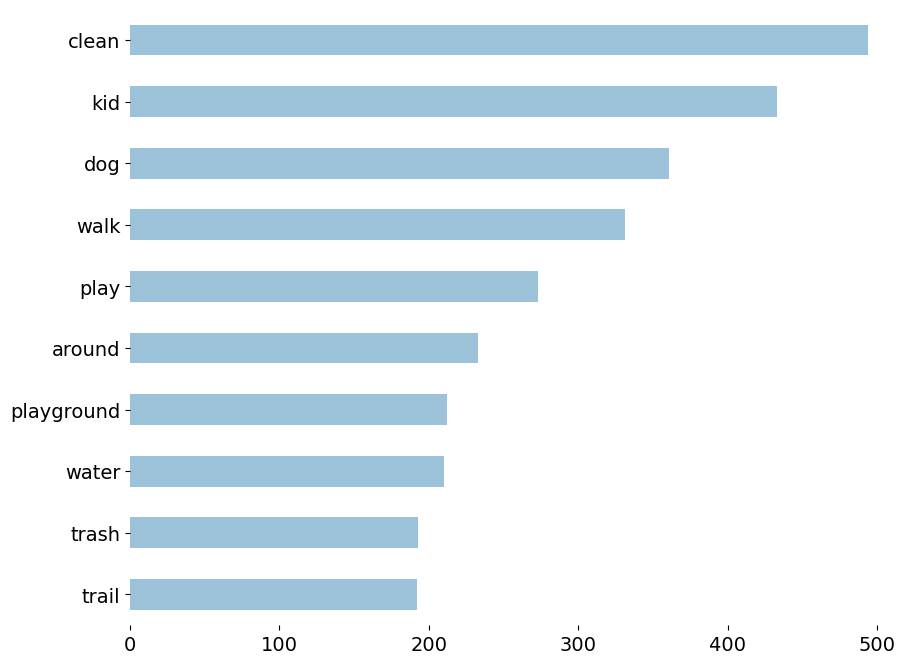

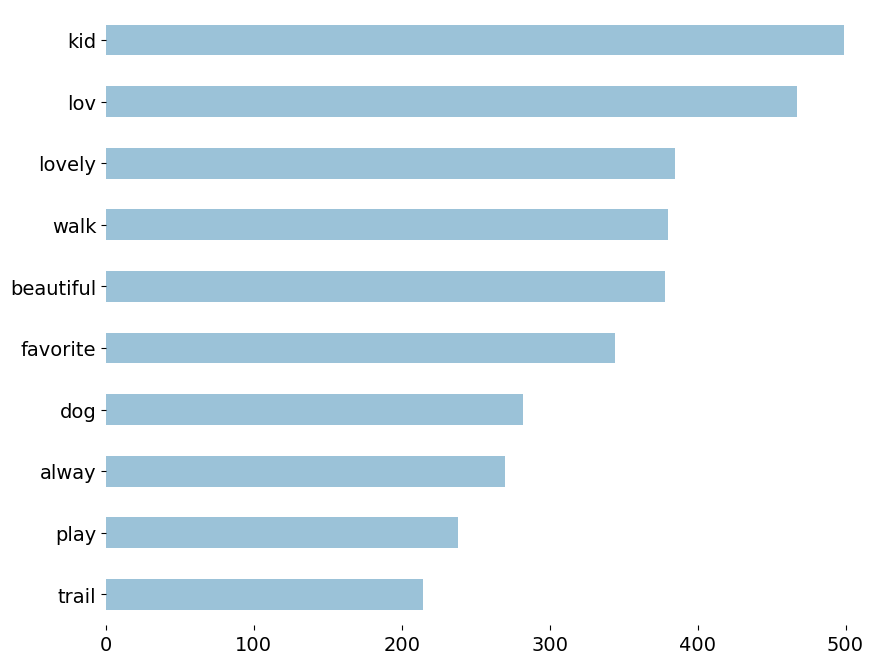

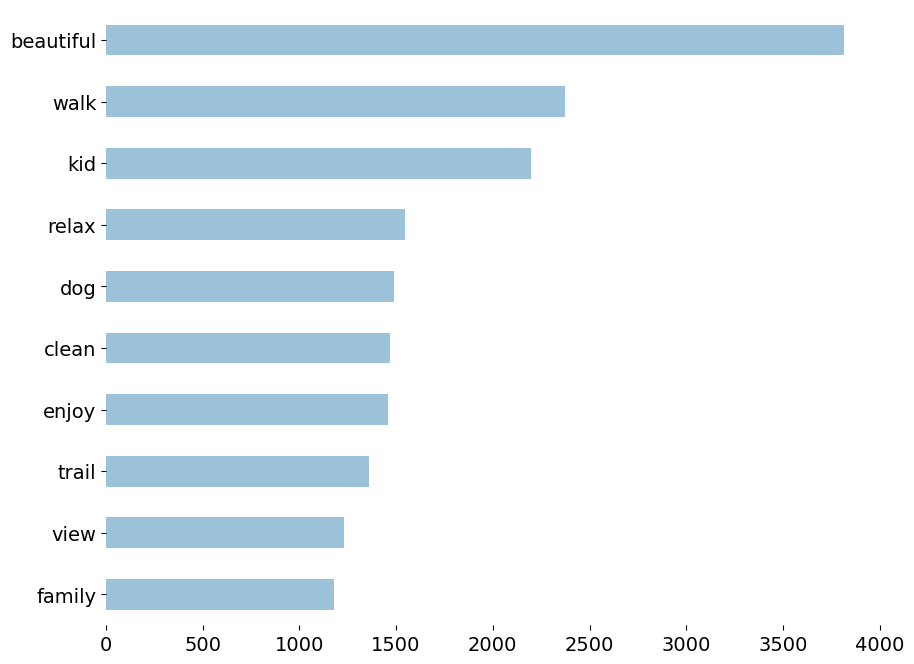

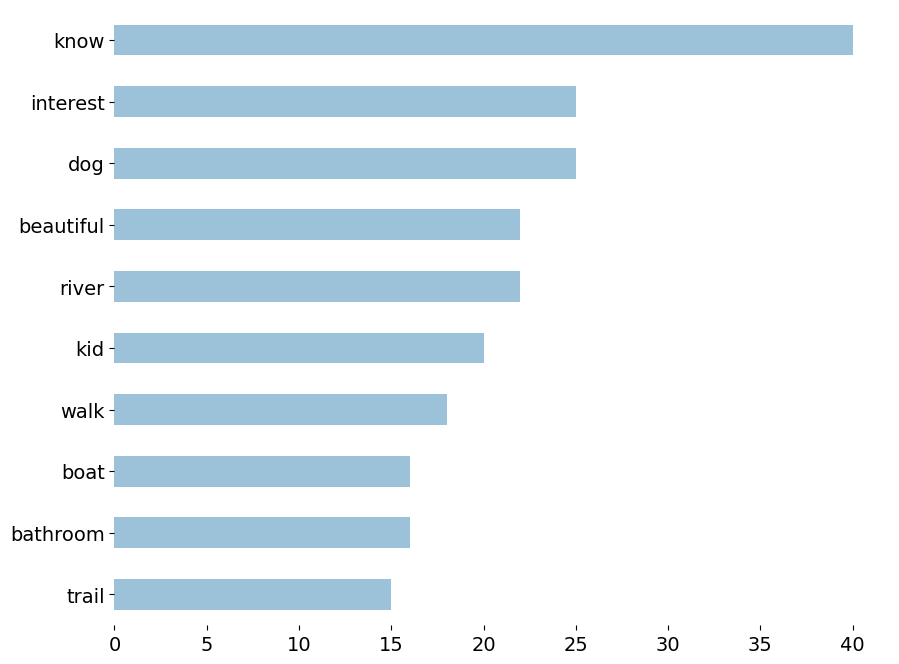

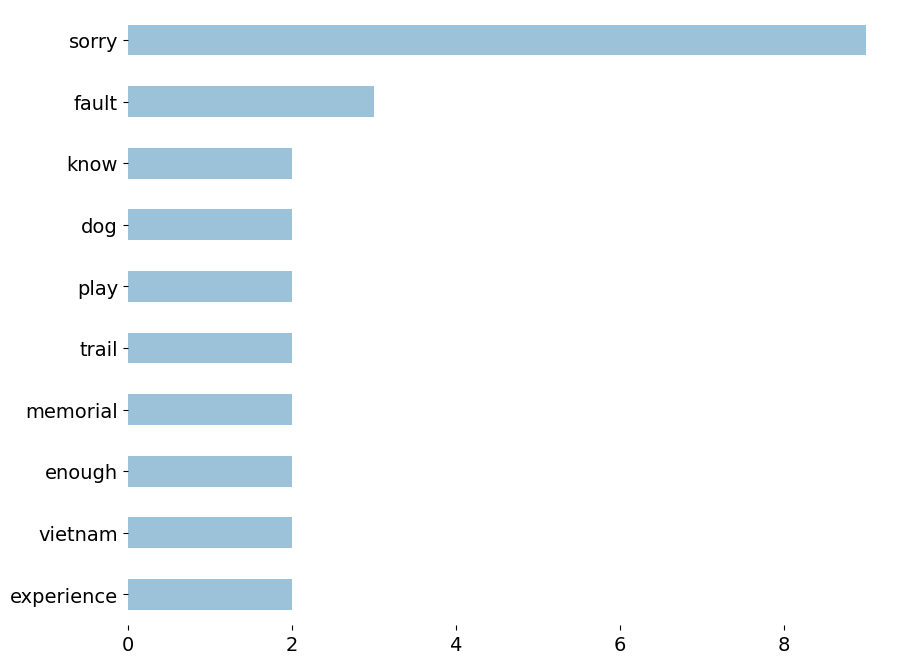

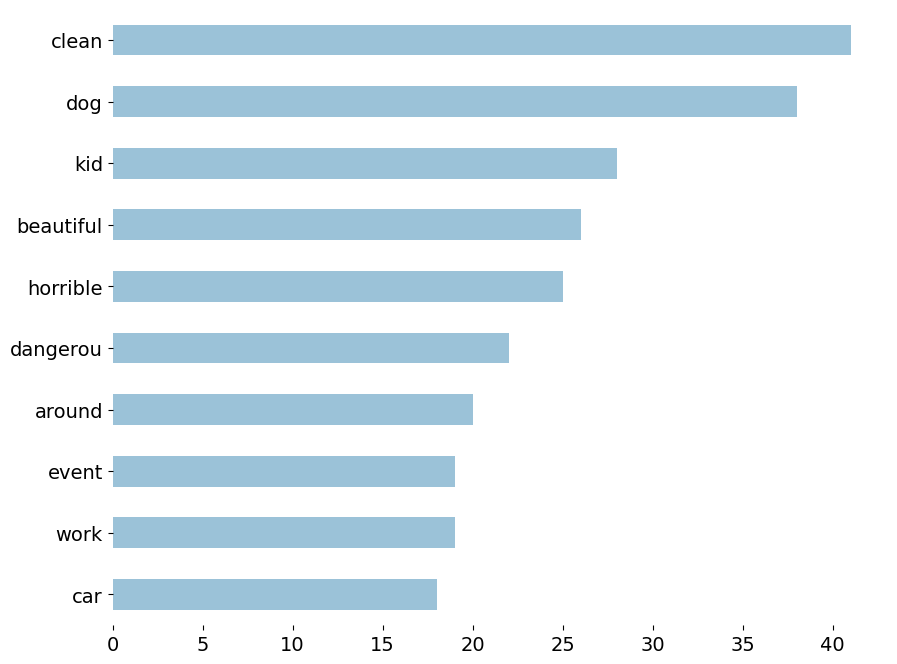

In [19]:
words_to_drop = ['park', 'place', 'nice', 'nan','s','*','’','good','great','love','fun','lol','go','little','littl',
                 'people','peopl','one', 'much', 'lot','citi','sad','philly','philli','philadelphia','dont','see', 'take', 
                 'city', 'get', 'area','like','many','went','always','best','well','would','really','sure','de',
                'going','hang','lots','im','bad', 'para', 'loved', 'leo','upon','time','thanks','thank','en','la','un','muy','lugar','es', 'wa','ha',
                'thi','ne','u', 'nan','always','even','lo','e','first']


inspiration_word_counts = content_analysis(inspiration_df, 'review_text', 'Inspiration', words_to_drop)
discovery_word_counts = content_analysis(discovery_df, 'review_text', 'Discovery', words_to_drop)
relexation_word_counts = content_analysis(relexation_df, 'review_text', 'Relexation', words_to_drop)
engagement_word_counts = content_analysis(engagement_df, 'review_text', 'Engagement', words_to_drop)
sorrow_word_counts = content_analysis(sorrow_df, 'review_text', 'Sorrow', words_to_drop)
frustration_word_counts = content_analysis(frustration_df, 'review_text', 'Frustration & Annoyance', words_to_drop)

### *LDA*

In [390]:
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import RegexpTokenizer
import nltk

In [405]:
# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "error"  # Handles short texts or detection errors

def perform_lda_topic_modeling(df, text_column, num_topics, num_words, words_to_drop):
    tokenizer = RegexpTokenizer(r'\w+')
    p_stemmer = PorterStemmer()

    # Create a list of stopwords and add custom words to drop
    stop_words = set(stopwords.words('english')) | set(words_to_drop)

    # List for tokenized documents in loop
    texts = []

    # Filter non-English reviews first
    df['language'] = df[text_column].apply(detect_language)
    df = df[df['language'] == 'en']  # Keeps only English-language texts

    # Loop through document list
    for i in df[text_column]:
        # Lowercase and tokenize document
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # Remove stop words and unwanted words
        stopped_tokens = [i for i in tokens if i not in stop_words]

        # Stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

        # Add tokens to list
        texts.append(stemmed_tokens)

    # Turn our tokenized documents into a id <-> term dictionary
    dictionary = Dictionary(texts)

    # Convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Generate LDA model
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    return ldamodel

def format_lda_results(ldamodel, num_topics, num_words):
    main_topics = {}
    for i in range(num_topics):
        words = ldamodel.show_topic(i, num_words)
        topic_words = ', '.join([word for word, prop in words])
        main_topics[f'Topic {i}'] = topic_words

    # Convert dictionary to DataFrame for nicer formatting
    topics_df = pd.DataFrame(list(main_topics.items()), columns=['Topic', 'Words'])
    return topics_df

def df_to_image(data, filename):
    fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=data.values, colLabels=data.columns, loc='center', cellLoc='center', colColours=["#B4BFC5"]*data.shape[1])
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)
    print(f"Table saved as {filename}")

def plot_lda_topics(ldamodel, num_topics, num_words):
    for i in range(num_topics):
        plt.figure(figsize=(10, 2))
        words, props = zip(*ldamodel.show_topic(i, num_words))
        plt.bar(words, props, color='skyblue')
        plt.title(f'Topic {i}')
        plt.xticks(rotation=30)
        plt.ylabel('Probability')
        plt.tight_layout()
        filename = f'topic_{i}_distribution.jpg'
        plt.savefig(filename, dpi=300)  # Save each topic as an image
        plt.close()
        print(f"Topic {i} distribution saved as {filename}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaoxi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [419]:
words_to_drop = ['park', 'place', 'nice', 'nan','s','*','’','good','great','love','fun','lol','go','little','littl',
                 'people','peopl','one', 'much', 'lot','citi','sad','philly','philli','philadelphia','dont','see', 'take', 
                 'city', 'get', 'area','like','many','went','always','best','well','would','really','sure','de',
                'going','hang','lots','im','bad','wow', 'en','in','para', 'la','un','lugar','muy','el','es', 'que', 'lo',
                 'ok','n','con','bonito','parqu','hermoso','st','lindo','lo', 'para', 'loved', 'leo','upon','time','thanks','thank','en','la','un','muy','lugar','es', 'wa','ha',
                'thi','ne','u', 'nan','always','even','lo','e','first','us', 'aaron','jhona']



In [407]:
inspiration_LDA = perform_lda_topic_modeling(inspiration_df, 'review_text', num_topics=4, num_words=5, words_to_drop=words_to_drop)


C:\Users\gaoxi\AppData\Local\Temp\ipykernel_31340\1260948435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df[text_column].apply(detect_language)


In [408]:
inspiration_df2 = format_lda_results(inspiration_LDA, num_topics=4, num_words=5)

df_to_image(inspiration_df2, 'D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_inspiration_table.jpg')

plot_lda_topics(inspiration_LDA, num_topics=4, num_words=5)

Table saved as D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_inspiration_table.jpg
Topic 0 distribution saved as topic_0_distribution.jpg
Topic 1 distribution saved as topic_1_distribution.jpg
Topic 2 distribution saved as topic_2_distribution.jpg
Topic 3 distribution saved as topic_3_distribution.jpg


In [409]:
discovery_LDA = perform_lda_topic_modeling(discovery_df, 'review_text', num_topics=4, num_words=6, words_to_drop=words_to_drop)


C:\Users\gaoxi\AppData\Local\Temp\ipykernel_31340\1260948435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df[text_column].apply(detect_language)


In [410]:
discovery_df2 = format_lda_results(discovery_LDA, num_topics=4, num_words=5)

df_to_image(discovery_df2, 'D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_discovery_table.jpg')

plot_lda_topics(discovery_LDA, num_topics=4, num_words=5)

Table saved as D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_discovery_table.jpg
Topic 0 distribution saved as topic_0_distribution.jpg
Topic 1 distribution saved as topic_1_distribution.jpg
Topic 2 distribution saved as topic_2_distribution.jpg
Topic 3 distribution saved as topic_3_distribution.jpg


In [411]:
relexation_LDA = perform_lda_topic_modeling(relexation_df, 'review_text', num_topics=4, num_words=6, words_to_drop=words_to_drop)


C:\Users\gaoxi\AppData\Local\Temp\ipykernel_31340\1260948435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df[text_column].apply(detect_language)


In [412]:
relexation_df2 = format_lda_results(relexation_LDA, num_topics=4, num_words=5)

df_to_image(relexation_df2, 'D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_relexation_table.jpg')

plot_lda_topics(relexation_LDA, num_topics=4, num_words=5)

Table saved as D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_relexation_table.jpg
Topic 0 distribution saved as topic_0_distribution.jpg
Topic 1 distribution saved as topic_1_distribution.jpg
Topic 2 distribution saved as topic_2_distribution.jpg
Topic 3 distribution saved as topic_3_distribution.jpg


In [413]:
engagement_LDA = perform_lda_topic_modeling(engagement_df, 'review_text', num_topics=4, num_words=6, words_to_drop=words_to_drop)


C:\Users\gaoxi\AppData\Local\Temp\ipykernel_31340\1260948435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df[text_column].apply(detect_language)


In [414]:
engagement_df2 = format_lda_results(engagement_LDA, num_topics=4, num_words=5)

df_to_image(engagement_df2, 'D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_engagement_table.jpg')

plot_lda_topics(engagement_LDA, num_topics=4, num_words=5)

Table saved as D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_engagement_table.jpg
Topic 0 distribution saved as topic_0_distribution.jpg
Topic 1 distribution saved as topic_1_distribution.jpg
Topic 2 distribution saved as topic_2_distribution.jpg
Topic 3 distribution saved as topic_3_distribution.jpg


In [415]:
sorrow_LDA = perform_lda_topic_modeling(sorrow_df, 'review_text', num_topics=4, num_words=5, words_to_drop=words_to_drop)


C:\Users\gaoxi\AppData\Local\Temp\ipykernel_31340\1260948435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df[text_column].apply(detect_language)


In [454]:
sorrow_df2 = format_lda_results(sorrow_LDA, num_topics=4, num_words=5)

df_to_image(sorrow_df2, 'D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_sorrow_table.jpg')

plot_lda_topics(sorrow_LDA, num_topics=4, num_words=5)

Table saved as D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_sorrow_table.jpg
Topic 0 distribution saved as topic_0_distribution.jpg
Topic 1 distribution saved as topic_1_distribution.jpg
Topic 2 distribution saved as topic_2_distribution.jpg
Topic 3 distribution saved as topic_3_distribution.jpg


In [421]:
frustration_LDA = perform_lda_topic_modeling(frustration_df, 'review_text', num_topics=4, num_words=5, words_to_drop=words_to_drop)

C:\Users\gaoxi\AppData\Local\Temp\ipykernel_31340\1260948435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df[text_column].apply(detect_language)


In [422]:
frustration_df2 = format_lda_results(frustration_LDA, num_topics=4, num_words=5)

df_to_image(frustration_df2, 'D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_frustration_table.jpg')

plot_lda_topics(frustration_LDA, num_topics=4, num_words=5)

Table saved as D:/AA MCP/24Spring/Capstone/24S_Capstone/output_files/lda_frustration_table.jpg
Topic 0 distribution saved as topic_0_distribution.jpg
Topic 1 distribution saved as topic_1_distribution.jpg
Topic 2 distribution saved as topic_2_distribution.jpg
Topic 3 distribution saved as topic_3_distribution.jpg
